Relevant Packages: pandas, numpy, matplotlib, statsmodels, pandas_datareader, yfinance, sklearn, PyPortfolioOpt

## Import Data + Packages

In [1]:
# Packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import random
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import warnings
import datetime as dt
import pandas_ta
import zipfile
import import_ipynb
from AT_Setup import create_stocks_df, test_strategy, SMA_Backtester
warnings.filterwarnings('ignore')

C:\Users\ynakadi\Anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


importing Jupyter notebook from AT_Setup.ipynb


In [2]:
sp500_df, stocks_df = create_stocks_df('2011-01-01','2024-03-01',500)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [3]:
stocks_df = stocks_df.reset_index().set_index(['Date','company'])

## Create Features

Features:
* **Garman-Klass Volatility** 
* **RSI** 
* **Bollinger Bands** 
* **ATR** 
* **MACD** 
* **Dollar Volume**

G-K Volatility = (ln(High) - ln(Low))**2 / 2 - (2*ln(2) - 1)(ln(Adj Close) - ln(Open))**2

In [4]:
stocks_df#.stack()

Open       High        Low      Close  Adj Close  \
Date       company                                                          
2011-01-03 MS       27.629999  28.570000  27.480000  28.230000  21.224796   
2011-01-04 MS       28.459999  28.500000  28.000000  28.469999  21.405243   
2011-01-05 MS       28.360001  28.830000  28.299999  28.830000  21.675909   
2011-01-06 MS       28.850000  28.980000  28.580000  28.799999  21.653353   
2011-01-07 MS       28.840000  28.889999  28.000000  28.200001  21.202242   
...                       ...        ...        ...        ...        ...   
2024-02-16 C        54.959999  55.200001  54.549999  54.849998  54.849998   
2024-02-20 C        54.580002  55.660000  54.360001  55.419998  55.419998   
2024-02-21 C        55.259998  55.459999  54.980000  55.330002  55.330002   
2024-02-22 C        55.439999  56.470001  55.410000  55.900002  55.900002   
2024-02-23 C        55.990002  56.340000  55.750000  55.930000  55.930000   

                      Volume  
Date       company            
2011-01-03 MS       21176700  
2011-01-04 MS       12859900  
2011-01-05 MS       15101100  
2011-01-06 MS       13200900  
2011-01-07 MS       17512600  
...                      ...  
2024-02-16 C        11513000  
2024-02-20 C        16537900  
2024-02-21 C         9321800  
2024-02-22 C        12904800  
2024-02-23 C        11634000  

[1590725 rows x 6 columns]

In [5]:
stocks_df['GK Volatility'] = ((np.log(stocks_df['High']) - np.log(stocks_df['Low']))**2 / 2) - \
                             ((2 * np.log(2) - 1) * (np.log(stocks_df['Adj Close']) - np.log(stocks_df['Open']))**2)

In [6]:
stocks_df['RSI'] = stocks_df.groupby(by='company')['Adj Close'].transform(lambda x: pandas_ta.rsi(close=x,length=20))

In [7]:
stocks_df['BB_Low'] = stocks_df.groupby(by='company')['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x)
                                                                                                        ,length=20).iloc[:,0])
stocks_df['BB_Mid'] = stocks_df.groupby(by='company')['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x)
                                                                                                        ,length=20).iloc[:,1])
stocks_df['BB_Upper'] = stocks_df.groupby(by='company')['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x)
                                                                                                        ,length=20).iloc[:,2])

In [8]:
def compute_atr(data):
    atr = pandas_ta.atr(high=data['High'], low = data['Low'], close = data['Close'], length = 14)
    # normalize
    return atr.sub(atr.mean()).div(atr.std())
    
stocks_df['ATR'] = stocks_df.groupby(by='company',group_keys=False).apply(compute_atr)

In [9]:
def compute_macd(data):
    macd = pandas_ta.macd(close = data['Close'], length = 20).iloc[:,0]
    # normalize
    return macd.sub(macd.mean()).div(macd.std())
    
stocks_df['MACD'] = stocks_df.groupby(by='company',group_keys=False).apply(compute_macd)

In [10]:
stocks_df['dollar_volume'] = (stocks_df['Adj Close'] * stocks_df['Volume']) / 1e6

In [11]:
stocks_df

Open       High        Low      Close  Adj Close  \
Date       company                                                          
2011-01-03 MS       27.629999  28.570000  27.480000  28.230000  21.224796   
2011-01-04 MS       28.459999  28.500000  28.000000  28.469999  21.405243   
2011-01-05 MS       28.360001  28.830000  28.299999  28.830000  21.675909   
2011-01-06 MS       28.850000  28.980000  28.580000  28.799999  21.653353   
2011-01-07 MS       28.840000  28.889999  28.000000  28.200001  21.202242   
...                       ...        ...        ...        ...        ...   
2024-02-16 C        54.959999  55.200001  54.549999  54.849998  54.849998   
2024-02-20 C        54.580002  55.660000  54.360001  55.419998  55.419998   
2024-02-21 C        55.259998  55.459999  54.980000  55.330002  55.330002   
2024-02-22 C        55.439999  56.470001  55.410000  55.900002  55.900002   
2024-02-23 C        55.990002  56.340000  55.750000  55.930000  55.930000   

                      Volume  GK Volatility        RSI    BB_Low    BB_Mid  \
Date       company                                                           
2011-01-03 MS       21176700      -0.026112        NaN       NaN       NaN   
2011-01-04 MS       12859900      -0.031190        NaN       NaN       NaN   
2011-01-05 MS       15101100      -0.027734        NaN       NaN       NaN   
2011-01-06 MS       13200900      -0.031711        NaN       NaN       NaN   
2011-01-07 MS       17512600      -0.036074        NaN       NaN       NaN   
...                      ...            ...        ...       ...       ...   
2024-02-16 C        11513000       0.000069  60.213410  3.969899  4.010328   
2024-02-20 C        16537900       0.000189  62.117098  3.974690  4.013135   
2024-02-21 C         9321800       0.000037  61.627029  3.978474  4.015436   
2024-02-22 C        12904800       0.000153  63.544526  3.982559  4.018278   
2024-02-23 C        11634000       0.000055  63.645167  3.985558  4.020714   

                    BB_Upper       ATR      MACD  dollar_volume  
Date       company                                               
2011-01-03 MS            NaN       NaN       NaN     449.471144  
2011-01-04 MS            NaN       NaN       NaN     275.269283  
2011-01-05 MS            NaN       NaN       NaN     327.330070  
2011-01-06 MS            NaN       NaN       NaN     285.843744  
2011-01-07 MS            NaN       NaN       NaN     371.306381  
...                      ...       ...       ...            ...  
2024-02-16 C        4.050757 -0.175185  0.496882     631.488032  
2024-02-20 C        4.051579 -0.164219  0.530690     916.530388  
2024-02-21 C        4.052398 -0.271450  0.545130     515.775211  
2024-02-22 C        4.053996 -0.276518  0.587573     721.378340  
2024-02-23 C        4.055871 -0.359977  0.616010     650.689624  

[1590725 rows x 14 columns]

## Aggregation, Find most Liquid Stocks

In [12]:
# Aggregate to Monthly Level

feature_cols = [x for x in stocks_df.columns if x not in ['Close','High','Low','Volume','Open','Close','dollar_volume']]
stocks_df.unstack()['dollar_volume'].resample('M').mean().stack().to_frame('Dollar Volume')

Dollar Volume
Date       company               
2011-01-31 A           122.420702
           AAL          68.747823
           AAPL       5541.476048
           ABT         423.958059
           ACGL         29.612816
...                           ...
2024-02-29 YUM         304.763678
           ZBH         228.738621
           ZBRA        128.058223
           ZION        132.207967
           ZTS         460.556926

[76027 rows x 1 columns]

In [13]:
stock_feature_df = pd.concat([stocks_df.unstack()[feature_cols].resample('M').last().stack(),
           stocks_df.unstack()['dollar_volume'].resample('M').mean().stack().to_frame('Dollar Volume')], axis=1)

In [14]:
stock_feature_df['Dollar Volume'] = stock_feature_df.loc[:,'Dollar Volume'].unstack().rolling(12*5,min_periods=12).mean().stack()

In [15]:
stock_feature_df["Dol_Vol_Rank"] = stock_feature_df.groupby('Date')['Dollar Volume'].rank(ascending=False)

In [16]:
stock_feature_df = stock_feature_df[stock_feature_df['Dol_Vol_Rank'] <= 150].drop(['Dol_Vol_Rank','Dollar Volume'],axis=1)

### Calculate Monthly Lags and Returns

In [17]:
def calculate_returns(data):
    # Monthly Lags
    lags = [1, 2, 3, 6, 9, 12]

    outlier_cutoff = 0.05

    for lag in lags:
        data[f'returns_{lag}m'] = (data['Adj Close'].pct_change(lag)\
                                .pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff),upper = x.quantile(1-outlier_cutoff)))\
                                .add(1).pow(1/lag).sub(1))
    return data

In [18]:
stock_feature_df = stock_feature_df.groupby(by='company',group_keys=False).apply(calculate_returns).dropna()
stock_feature_df

ATR   Adj Close    BB_Low    BB_Mid  BB_Upper  \
Date       company                                                       
2012-12-31 A       -0.866758   26.625996  3.232811  3.291256  3.349702   
           AAPL    -0.651382   16.233425  2.778827  2.846073  2.913320   
           ABT     -0.923272   25.372898  3.252231  3.268683  3.285136   
           ACN     -0.765158   54.327560  3.996828  4.046955  4.097082   
           ADBE    -0.896457   37.680000  3.567346  3.626436  3.685525   
...                      ...         ...       ...       ...       ...   
2024-02-29 VRTX     1.719485  430.109985  6.020800  6.055714  6.090628   
           VZ       0.043958   40.660000  3.694799  3.738466  3.782132   
           WFC      0.711044   53.860001  3.862010  3.932859  4.003709   
           WMT      1.168501   58.520000  4.014592  4.052403  4.090213   
           XOM      0.699915  103.839996  4.612865  4.638314  4.663762   

                    GK Volatility      MACD        RSI  returns_1m  \
Date       company                                                   
2012-12-31 A            -0.001046  0.248275  59.466140    0.071830   
           AAPL         -0.003935 -0.534613  44.756427   -0.090743   
           ABT          -0.014091 -0.174197  51.076380    0.007692   
           ACN          -0.013351 -0.360531  44.317485   -0.020907   
           ADBE          0.000183 -0.041893  65.897910    0.088703   
...                           ...       ...        ...         ...   
2024-02-29 VRTX          0.000079  0.099782  56.892021   -0.007545   
           VZ            0.000143  0.328778  55.120759   -0.039906   
           WFC           0.000048  1.374069  69.518786    0.080875   
           WMT           0.000084  2.360255  69.651486    0.062390   
           XOM           0.000068  0.604329  55.760125    0.019405   

                    returns_2m  returns_3m  returns_6m  returns_9m  \
Date       company                                                   
2012-12-31 A          0.067861    0.021970    0.007940   -0.008399   
           AAPL      -0.052368   -0.064541   -0.013918   -0.012189   
           ABT        0.000000   -0.012714    0.005167    0.010052   
           ACN       -0.006773   -0.013294    0.019000    0.005890   
           ADBE       0.052263    0.051179    0.025639    0.010465   
...                        ...         ...         ...         ...   
2024-02-29 VRTX       0.028138    0.066255    0.035768    0.032130   
           VZ         0.047235    0.025566    0.031883    0.021068   
           WFC        0.049741    0.067471    0.041469    0.036879   
           WMT        0.055275    0.044731    0.014739    0.022503   
           XOM        0.023846    0.006656   -0.008305    0.004748   

                    returns_12m  
Date       company               
2012-12-31 A           0.014159  
           AAPL        0.023771  
           ABT         0.015517  
           ACN         0.020618  
           ADBE        0.024233  
...                         ...  
2024-02-29 VRTX        0.033306  
           VZ          0.009930  
           WFC         0.014488  
           WMT         0.021633  
           XOM        -0.001803  

[19447 rows x 14 columns]

### FAMA-French Factors

In [19]:
factor_df = web.DataReader('F-F_Research_Data_5_Factors_2x3','famafrench',start='2010')[0].drop('RF',axis=1)
factor_df.index = factor_df.index.to_timestamp()

In [20]:
factor_df = factor_df.resample('M').last().div(100)
factor_df

Mkt-RF     SMB     HML     RMW     CMA
Date                                              
2010-01-31 -0.0336  0.0034  0.0043 -0.0127  0.0046
2010-02-28  0.0340  0.0151  0.0323 -0.0027  0.0143
2010-03-31  0.0631  0.0185  0.0221 -0.0065  0.0169
2010-04-30  0.0200  0.0498  0.0289  0.0069  0.0172
2010-05-31 -0.0789  0.0004 -0.0244  0.0130 -0.0021
...            ...     ...     ...     ...     ...
2023-08-31 -0.0239 -0.0365 -0.0106  0.0343 -0.0237
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066
2023-11-30  0.0884 -0.0012  0.0164 -0.0391 -0.0100
2023-12-31  0.0485  0.0732  0.0494 -0.0307  0.0132

[168 rows x 5 columns]

In [21]:
# Merge with Stock Features to Evaluate 1 month returns
factor_df = factor_df.join(stock_feature_df['returns_1m'])

In [22]:
# Filter stocks with < 12 months of data
min_months = 12
observations = factor_df.groupby('company').size()
valid_stocks = observations[observations >= min_months]
factor_df = factor_df[factor_df.index.get_level_values('company').isin(valid_stocks.index)]
factor_df

Mkt-RF     SMB     HML     RMW     CMA  returns_1m
Date       company                                                    
2012-12-31 A        0.0118  0.0189  0.0351 -0.0185  0.0091    0.071830
           AAPL     0.0118  0.0189  0.0351 -0.0185  0.0091   -0.090743
           ABT      0.0118  0.0189  0.0351 -0.0185  0.0091    0.007692
           ACN      0.0118  0.0189  0.0351 -0.0185  0.0091   -0.020907
           ADBE     0.0118  0.0189  0.0351 -0.0185  0.0091    0.088703
...                    ...     ...     ...     ...     ...         ...
2023-12-31 VRTX     0.0485  0.0732  0.0494 -0.0307  0.0132    0.146783
           VZ       0.0485  0.0732  0.0494 -0.0307  0.0132   -0.016436
           WFC      0.0485  0.0732  0.0494 -0.0307  0.0132    0.103835
           WMT      0.0485  0.0732  0.0494 -0.0307  0.0132    0.023956
           XOM      0.0485  0.0732  0.0494 -0.0307  0.0132   -0.026864

[19102 rows x 6 columns]

### Calculate Rolling Factor Betas

In [23]:
betas = factor_df.groupby(level=1,group_keys=False).apply(lambda x: RollingOLS(endog = x['returns_1m'],
                                                                          exog = sm.add_constant(x.drop('returns_1m',axis=1)),
                                                                          window = min(24,x.shape[0]), # 2 years
                                                                          min_nobs = len(x.columns) + 1)\
                                                                          .fit(params_only=True).params.drop('const',axis=1))
betas

Mkt-RF       SMB       HML       RMW       CMA
Date       company                                                  
2012-12-31 A             NaN       NaN       NaN       NaN       NaN
           AAPL          NaN       NaN       NaN       NaN       NaN
           ABT           NaN       NaN       NaN       NaN       NaN
           ACN           NaN       NaN       NaN       NaN       NaN
           ADBE          NaN       NaN       NaN       NaN       NaN
...                      ...       ...       ...       ...       ...
2023-12-31 VRTX     0.360415  0.009107 -0.291635 -0.024355  0.716337
           VZ       0.413427 -0.630883  0.467910  0.090502 -0.170157
           WFC      0.984626  0.041418  1.666326 -0.284378 -1.269880
           WMT      0.503628  0.128467 -0.516137  0.651484  0.614103
           XOM      0.565585 -0.224224  0.516060  0.393500  0.334200

[19102 rows x 5 columns]

In [24]:
# Combine everything
stock_features_df = betas.groupby(by='company').shift().join(stock_feature_df)
stock_features_df

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 A             NaN       NaN       NaN       NaN       NaN   
           AAPL          NaN       NaN       NaN       NaN       NaN   
           ABT           NaN       NaN       NaN       NaN       NaN   
           ACN           NaN       NaN       NaN       NaN       NaN   
           ADBE          NaN       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
2023-12-31 VRTX     0.376808 -0.323843 -0.446705  0.323122  0.872078   
           VZ       0.418818 -0.622015  0.453085  0.124839 -0.145407   
           WFC      0.985467  0.140490  1.693871 -0.345004 -1.287869   
           WMT      0.487524  0.022611 -0.496116  0.602528  0.557927   
           XOM      0.560216 -0.013326  0.597975  0.210908  0.260415   

                         ATR   Adj Close    BB_Low    BB_Mid  BB_Upper  \
Date       company                                                       
2012-12-31 A       -0.866758   26.625996  3.232811  3.291256  3.349702   
           AAPL    -0.651382   16.233425  2.778827  2.846073  2.913320   
           ABT     -0.923272   25.372898  3.252231  3.268683  3.285136   
           ACN     -0.765158   54.327560  3.996828  4.046955  4.097082   
           ADBE    -0.896457   37.680000  3.567346  3.626436  3.685525   
...                      ...         ...       ...       ...       ...   
2023-12-31 VRTX     1.471938  406.890015  5.817492  5.953002  6.088512   
           VZ      -1.077085   37.074799  3.616386  3.640871  3.665356   
           WFC     -0.299570   48.876698  3.793252  3.881014  3.968775   
           WMT      0.442031   52.549999  3.930176  3.958044  3.985912   
           XOM      0.275963   99.059380  4.584927  4.613518  4.642108   

                    GK Volatility      MACD        RSI  returns_1m  \
Date       company                                                   
2012-12-31 A            -0.001046  0.248275  59.466140    0.071830   
           AAPL         -0.003935 -0.534613  44.756427   -0.090743   
           ABT          -0.014091 -0.174197  51.076380    0.007692   
           ACN          -0.013351 -0.360531  44.317485   -0.020907   
           ADBE          0.000183 -0.041893  65.897910    0.088703   
...                           ...       ...        ...         ...   
2023-12-31 VRTX          0.000028  3.566956  65.899356    0.146783   
           VZ            0.000043  0.435614  57.985178   -0.016436   
           WFC          -0.000008  2.020605  67.347851    0.103835   
           WMT           0.000017 -0.308358  53.576899    0.023956   
           XOM          -0.000020 -0.639450  42.607129   -0.026864   

                    returns_2m  returns_3m  returns_6m  returns_9m  \
Date       company                                                   
2012-12-31 A          0.067861    0.021970    0.007940   -0.008399   
           AAPL      -0.052368   -0.064541   -0.013918   -0.012189   
           ABT        0.000000   -0.012714    0.005167    0.010052   
           ACN       -0.006773   -0.013294    0.019000    0.005890   
           ADBE       0.052263    0.051179    0.025639    0.010465   
...                        ...         ...         ...         ...   
2023-12-31 VRTX       0.060030    0.053758    0.024490    0.028824   
           VZ         0.035933    0.044826    0.008786    0.002693   
           WFC        0.095253    0.067168    0.026895    0.033852   
           WMT       -0.012285   -0.001065    0.004147    0.011190   
           XOM       -0.023690   -0.037375   -0.008782   -0.007363   

                    returns_12m  
Date       company               
2012-12-31 A           0.014159  
           AAPL        0.023771  
           ABT         0.015517  
           ACN         0.020618  
           ADBE        0.024233  
...                         ...  
2023-12-31 VRTX        0.028

In [25]:
factors = ['Mkt-RF', "SMB", "HML", "RMW", "CMA"]
stock_features_df.loc[:, factors] = stock_features_df.groupby('company',group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))


stock_features_df = stock_features_df.dropna()
stock_features_df = stock_features_df.drop('Adj Close',axis=1)

In [26]:
stock_features_df#.info()

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 AAPL     1.148746 -0.139616 -0.332574  0.841089 -0.743516   
           ABT      0.974205 -0.169509 -0.557544  0.085584  0.517765   
           ACN      1.030234 -0.298879 -0.161167 -0.010256 -0.098524   
           ADBE     0.996710 -0.284266 -0.078692 -0.468476 -1.197724   
           AIG      1.048525 -0.472771  0.811721 -0.751357 -0.610841   
...                      ...       ...       ...       ...       ...   
2023-12-31 VRTX     0.376808 -0.323843 -0.446705  0.323122  0.872078   
           VZ       0.418818 -0.622015  0.453085  0.124839 -0.145407   
           WFC      0.985467  0.140490  1.693871 -0.345004 -1.287869   
           WMT      0.487524  0.022611 -0.496116  0.602528  0.557927   
           XOM      0.560216 -0.013326  0.597975  0.210908  0.260415   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2012-12-31 AAPL    -0.651382  2.778827  2.846073  2.913320      -0.003935   
           ABT     -0.923272  3.252231  3.268683  3.285136      -0.014091   
           ACN     -0.765158  3.996828  4.046955  4.097082      -0.013351   
           ADBE    -0.896457  3.567346  3.626436  3.685525       0.000183   
           AIG     -0.728207  3.297750  3.342037  3.386324      -0.018144   
...                      ...       ...       ...       ...            ...   
2023-12-31 VRTX     1.471938  5.817492  5.953002  6.088512       0.000028   
           VZ      -1.077085  3.616386  3.640871  3.665356       0.000043   
           WFC     -0.299570  3.793252  3.881014  3.968775      -0.000008   
           WMT      0.442031  3.930176  3.958044  3.985912       0.000017   
           XOM      0.275963  4.584927  4.613518  4.642108      -0.000020   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2012-12-31 AAPL    -0.534613  44.756427   -0.090743   -0.052368   -0.064541   
           ABT     -0.174197  51.076380    0.007692    0.000000   -0.012714   
           ACN     -0.360531  44.317485   -0.020907   -0.006773   -0.013294   
           ADBE    -0.041893  65.897910    0.088703    0.052263    0.051179   
           AIG      0.433897  55.642357    0.065500    0.005282    0.024891   
...                      ...        ...         ...         ...         ...   
2023-12-31 VRTX     3.566956  65.899356    0.146783    0.060030    0.053758   
           VZ       0.435614  57.985178   -0.016436    0.035933    0.044826   
           WFC      2.020605  67.347851    0.103835    0.095253    0.067168   
           WMT     -0.308358  53.576899    0.023956   -0.012285   -0.001065   
           XOM     -0.639450  42.607129   -0.026864   -0.023690   -0.037375   

                    returns_6m  returns_9m  returns_12m  
Date       company                                       
2012-12-31 AAPL      -0.013918   -0.012189     0.023771  
           ABT        0.005167    0.010052     0.015517  
           ACN        0.019000    0.005890     0.020618  
           ADBE       0.025639    0.010465     0.024233  
           AIG        0.016017    0.015158     0.034738  
...                        ...         ...          ...  
2023-12-31 VRTX       0.024490    0.028824     0.028985  
           VZ         0.008786    0.002693     0.002233  
           WFC        0.026895    0.033852     0.017357  
           WMT        0.004147    0.011190     0.012715  
           XOM       -0.008782   -0.007363    -0.005374  

[18868 rows x 18 columns]

## ML Models

### KMeans Clustering

In [27]:
# Notes: 
# Optimal # of clusters is around 4
# Initialize predefined centroids for each cluster based on your research

In [28]:
from sklearn.cluster import KMeans
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters = 4, random_state = 42, init = 'random').fit(df).labels_
    return df

stock_features_df = stock_features_df.groupby('Date',group_keys=False).apply(get_clusters)
stock_features_df

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 AAPL     1.148746 -0.139616 -0.332574  0.841089 -0.743516   
           ABT      0.974205 -0.169509 -0.557544  0.085584  0.517765   
           ACN      1.030234 -0.298879 -0.161167 -0.010256 -0.098524   
           ADBE     0.996710 -0.284266 -0.078692 -0.468476 -1.197724   
           AIG      1.048525 -0.472771  0.811721 -0.751357 -0.610841   
...                      ...       ...       ...       ...       ...   
2023-12-31 VRTX     0.376808 -0.323843 -0.446705  0.323122  0.872078   
           VZ       0.418818 -0.622015  0.453085  0.124839 -0.145407   
           WFC      0.985467  0.140490  1.693871 -0.345004 -1.287869   
           WMT      0.487524  0.022611 -0.496116  0.602528  0.557927   
           XOM      0.560216 -0.013326  0.597975  0.210908  0.260415   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2012-12-31 AAPL    -0.651382  2.778827  2.846073  2.913320      -0.003935   
           ABT     -0.923272  3.252231  3.268683  3.285136      -0.014091   
           ACN     -0.765158  3.996828  4.046955  4.097082      -0.013351   
           ADBE    -0.896457  3.567346  3.626436  3.685525       0.000183   
           AIG     -0.728207  3.297750  3.342037  3.386324      -0.018144   
...                      ...       ...       ...       ...            ...   
2023-12-31 VRTX     1.471938  5.817492  5.953002  6.088512       0.000028   
           VZ      -1.077085  3.616386  3.640871  3.665356       0.000043   
           WFC     -0.299570  3.793252  3.881014  3.968775      -0.000008   
           WMT      0.442031  3.930176  3.958044  3.985912       0.000017   
           XOM      0.275963  4.584927  4.613518  4.642108      -0.000020   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2012-12-31 AAPL    -0.534613  44.756427   -0.090743   -0.052368   -0.064541   
           ABT     -0.174197  51.076380    0.007692    0.000000   -0.012714   
           ACN     -0.360531  44.317485   -0.020907   -0.006773   -0.013294   
           ADBE    -0.041893  65.897910    0.088703    0.052263    0.051179   
           AIG      0.433897  55.642357    0.065500    0.005282    0.024891   
...                      ...        ...         ...         ...         ...   
2023-12-31 VRTX     3.566956  65.899356    0.146783    0.060030    0.053758   
           VZ       0.435614  57.985178   -0.016436    0.035933    0.044826   
           WFC      2.020605  67.347851    0.103835    0.095253    0.067168   
           WMT     -0.308358  53.576899    0.023956   -0.012285   -0.001065   
           XOM     -0.639450  42.607129   -0.026864   -0.023690   -0.037375   

                    returns_6m  returns_9m  returns_12m  cluster  
Date       company                                                
2012-12-31 AAPL      -0.013918   -0.012189     0.023771        2  
           ABT        0.005167    0.010052     0.015517        1  
           ACN        0.019000    0.005890     0.020618        2  
           ADBE       0.025639    0.010465     0.024233        3  
           AIG        0.016017    0.015158     0.034738        0  
...                        ...         ...          ...      ...  
2023-12-31 VRTX       0.024490    0.028824     0.028985        3  
           VZ         0.008786    0.002693     0.002233        0  
           WFC        0.026895    0.033852     0.017357        3  
           WMT        0.004147    0.011190     0.012715        0  
           XOM       -0.008782   -0.007363    -0.005374        2  

[18868 rows x 19 columns]

In [29]:
def plot_clusters(df):
    cluster_0 = df[df['cluster'] == 0]
    cluster_1 = df[df['cluster'] == 1]
    cluster_2 = df[df['cluster'] == 2]
    cluster_3 = df[df['cluster'] == 3]
    # 5 is ATR, 11 is RSI
    plt.scatter(cluster_0.iloc[:,5], cluster_0.iloc[:,11],color='red',label = 'Cluster 0')
    plt.scatter(cluster_1.iloc[:,5], cluster_1.iloc[:,11],color='black',label = 'Cluster 1')
    plt.scatter(cluster_2.iloc[:,5], cluster_2.iloc[:,11],color='green',label = 'Cluster 2')
    plt.scatter(cluster_3.iloc[:,5], cluster_3.iloc[:,11],color='blue',label = 'Cluster 3')

    plt.legend()
    plt.show()
    return

In [30]:
int(np.sqrt(len(stock_features_df.index.get_level_values('Date').unique().tolist())))

11

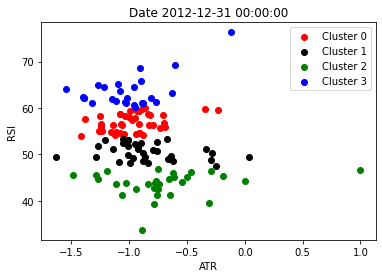

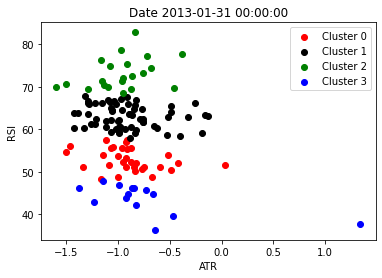

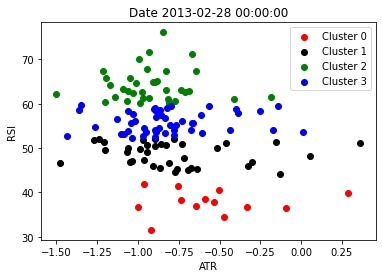

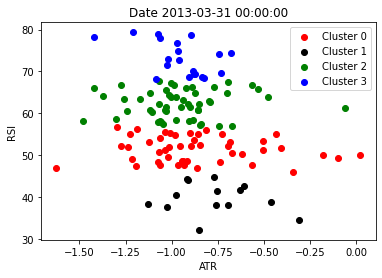

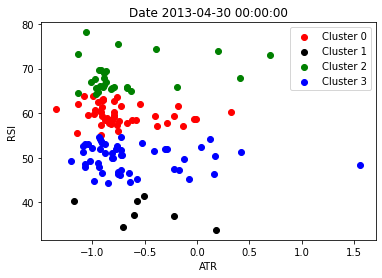

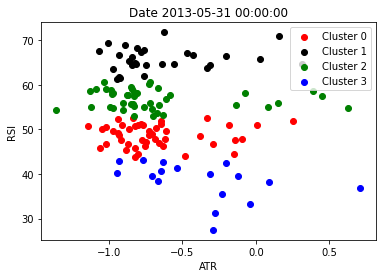

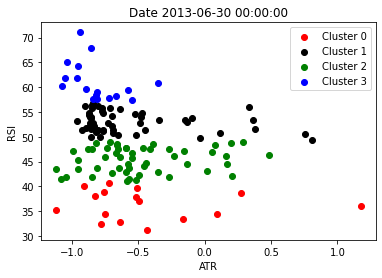

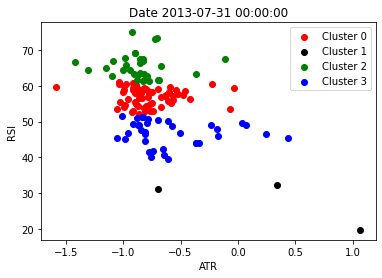

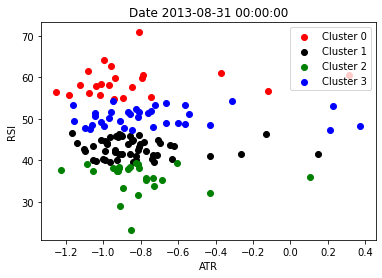

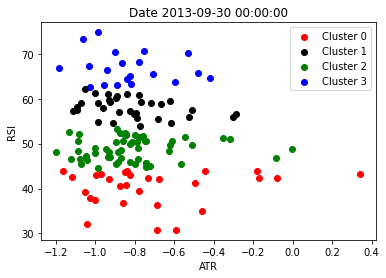

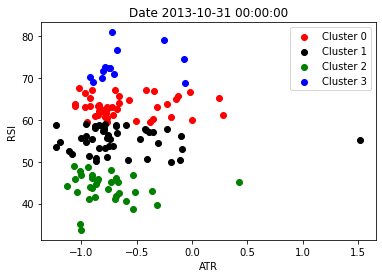

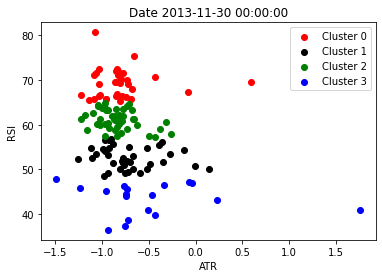

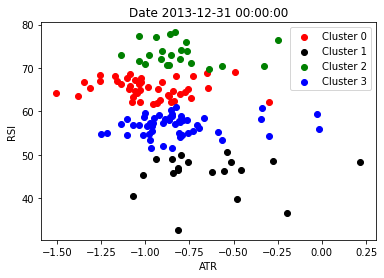

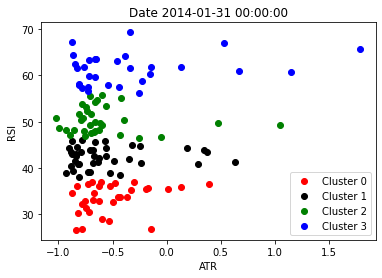

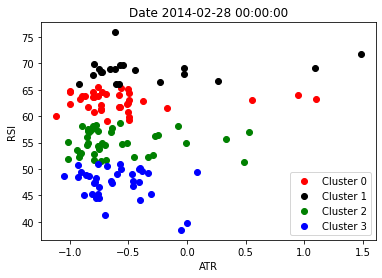

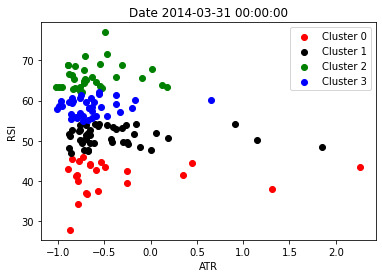

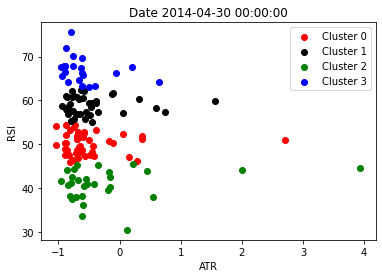

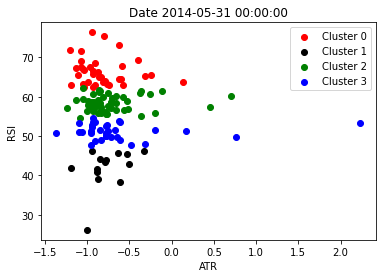

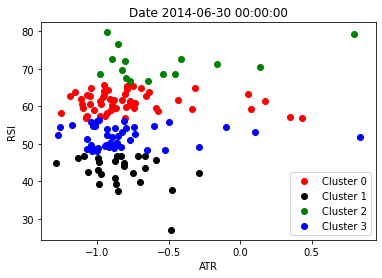

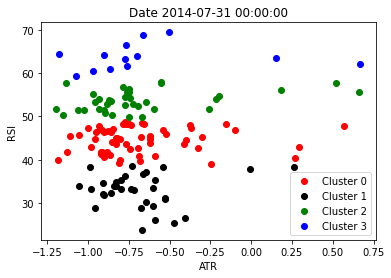

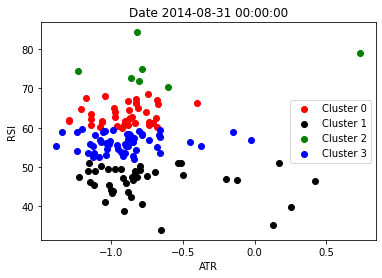

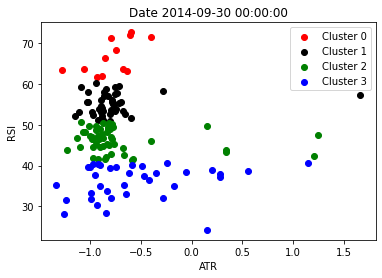

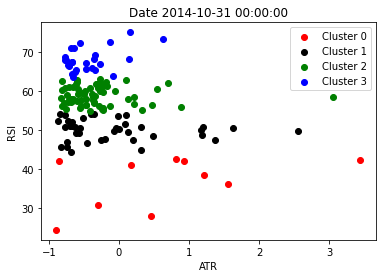

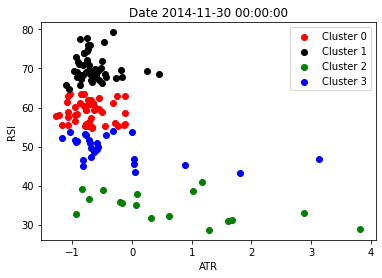

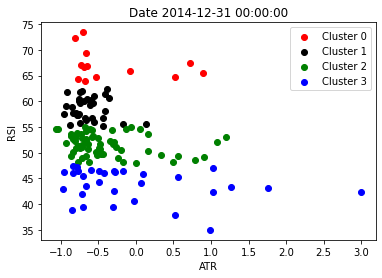

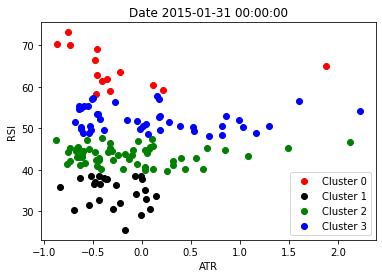

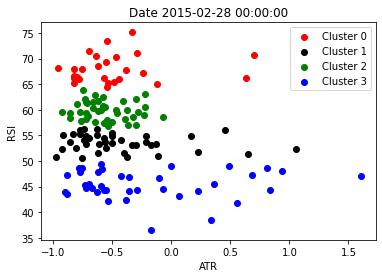

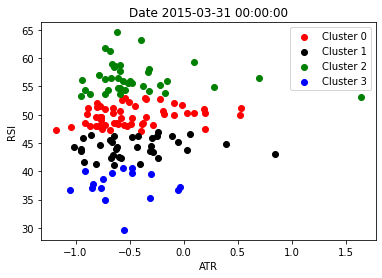

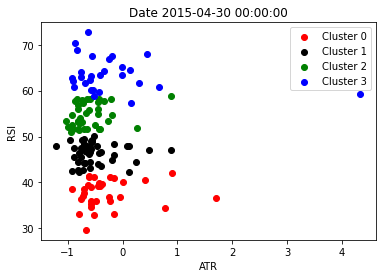

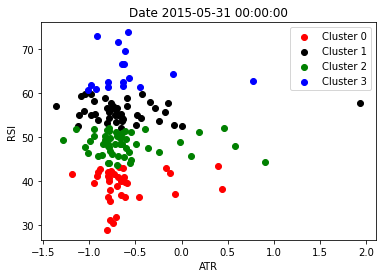

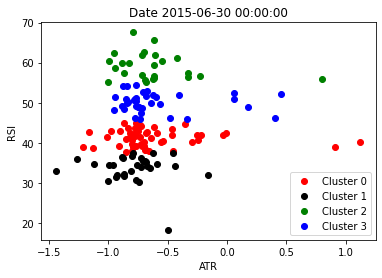

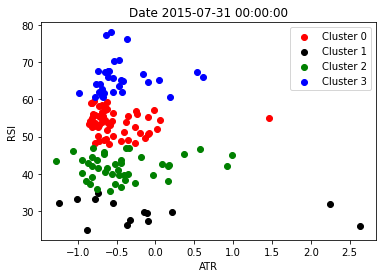

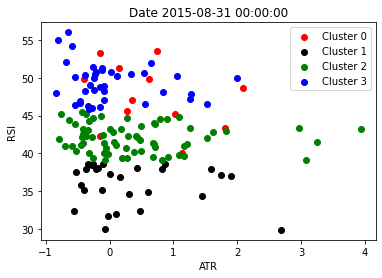

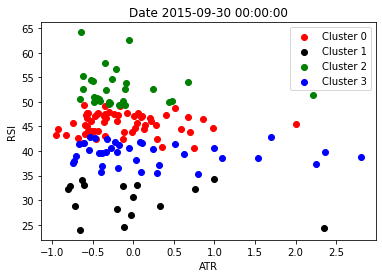

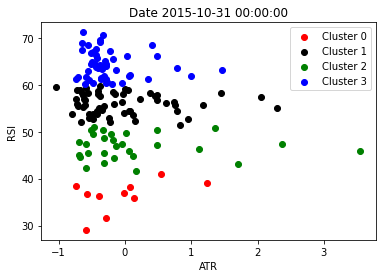

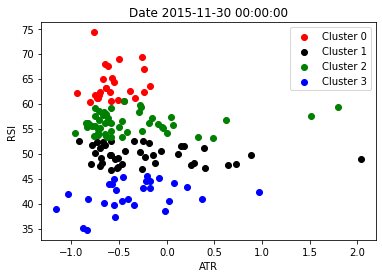

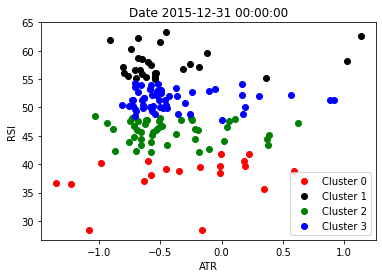

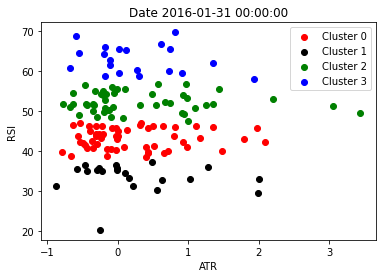

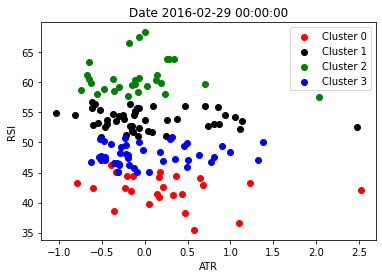

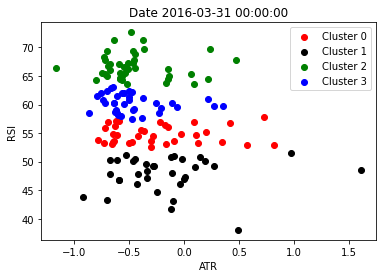

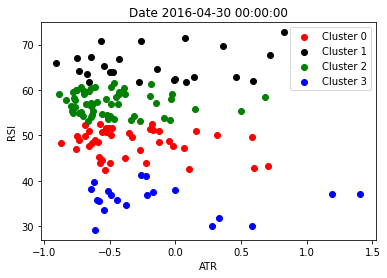

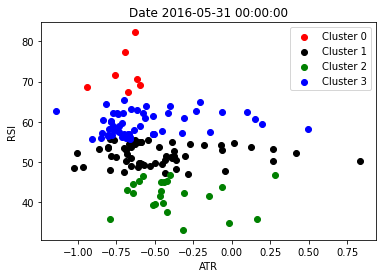

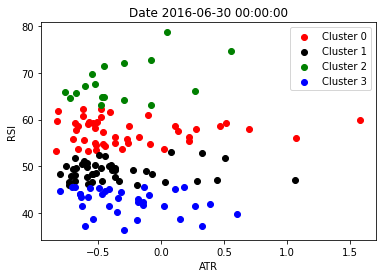

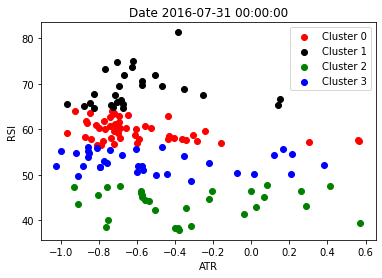

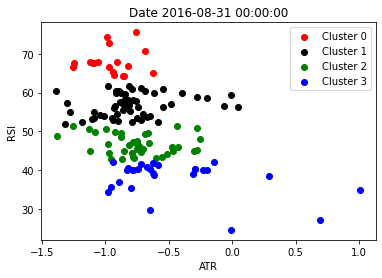

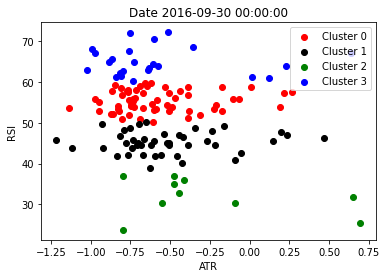

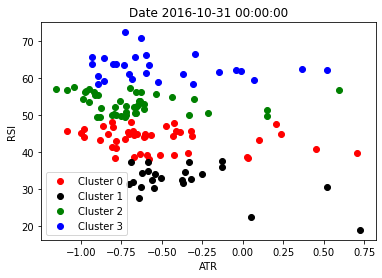

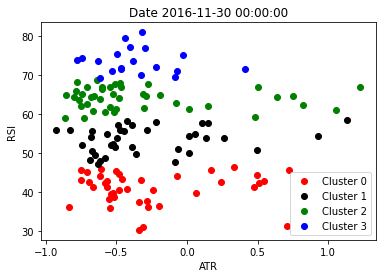

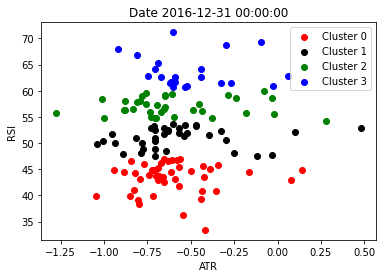

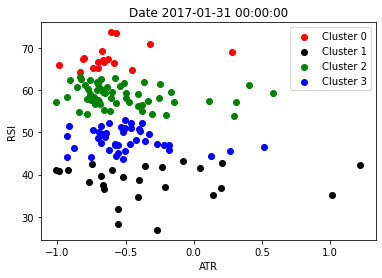

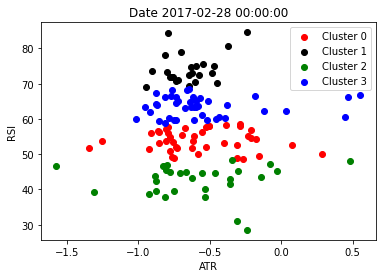

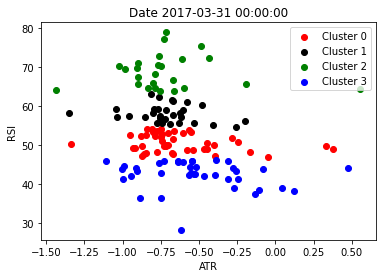

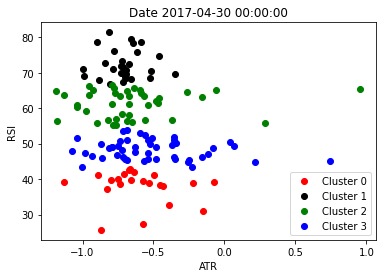

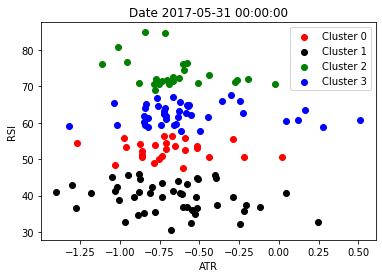

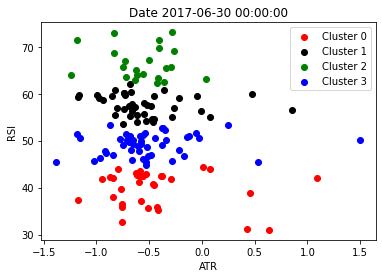

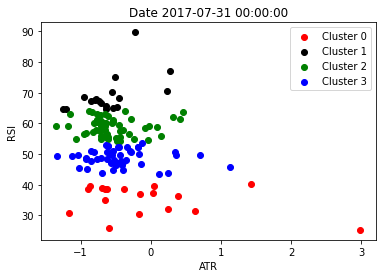

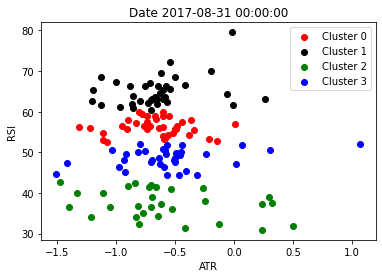

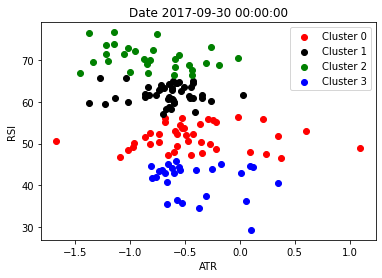

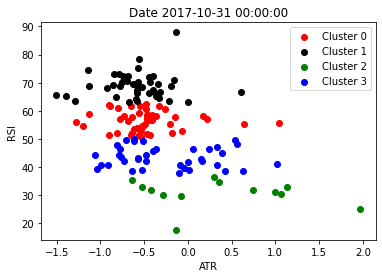

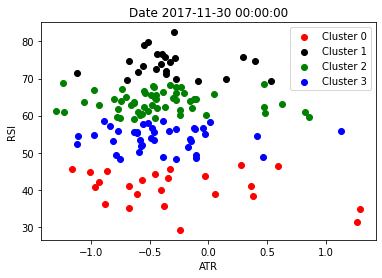

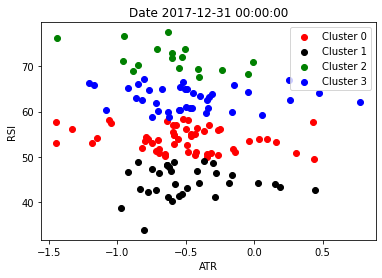

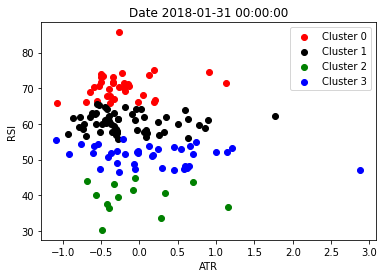

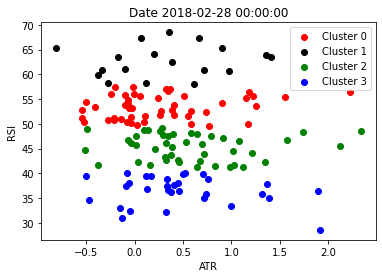

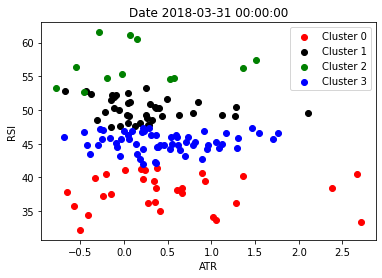

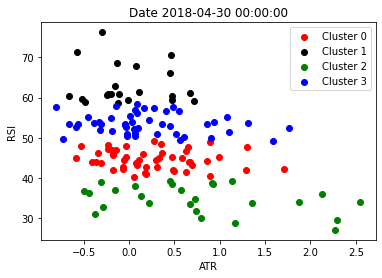

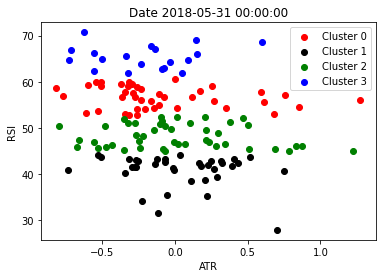

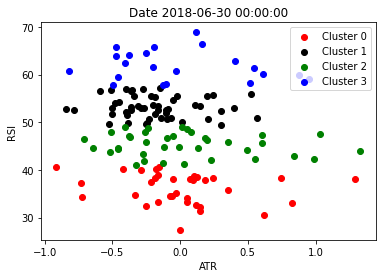

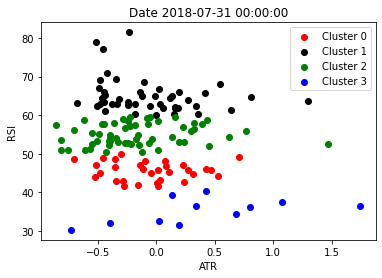

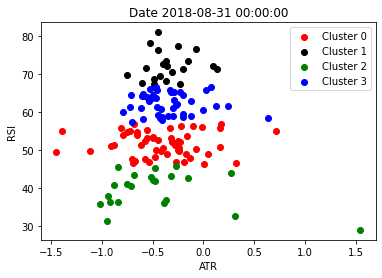

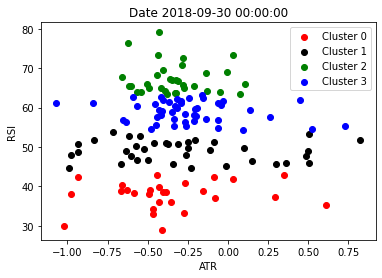

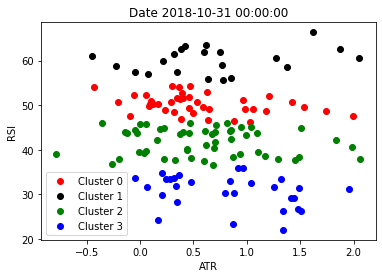

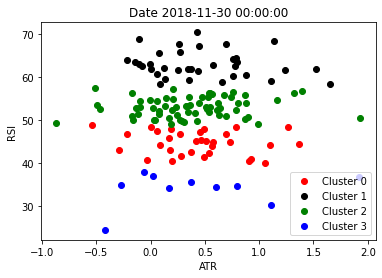

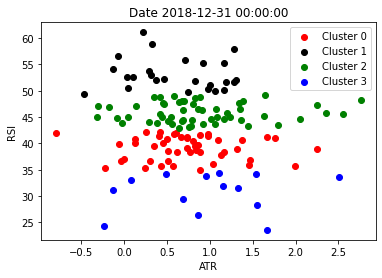

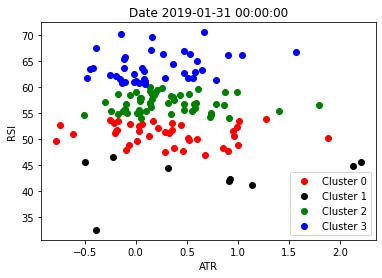

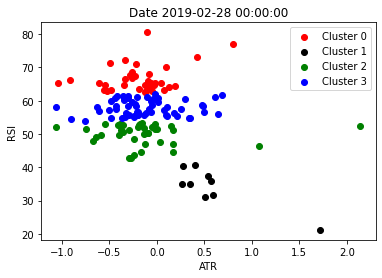

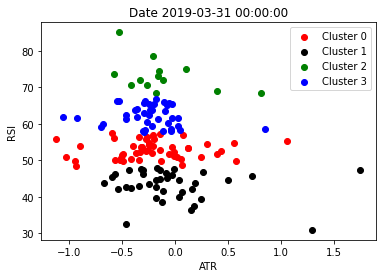

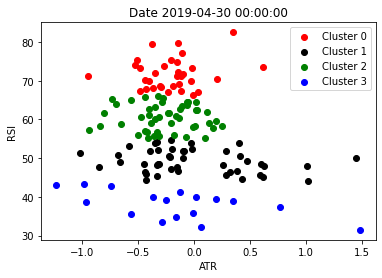

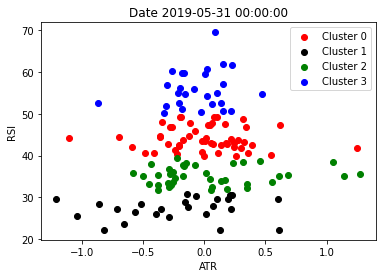

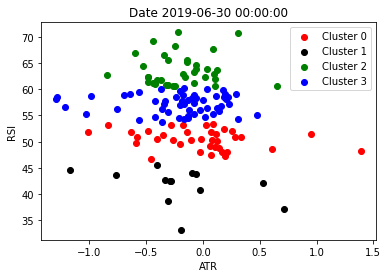

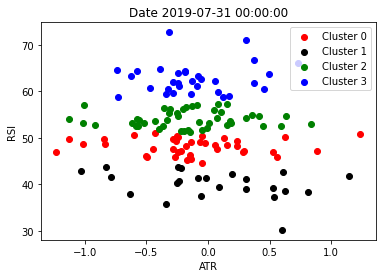

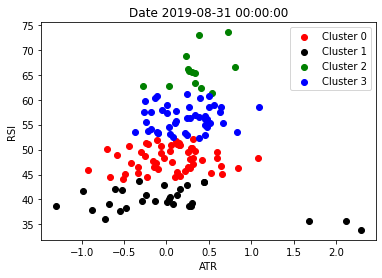

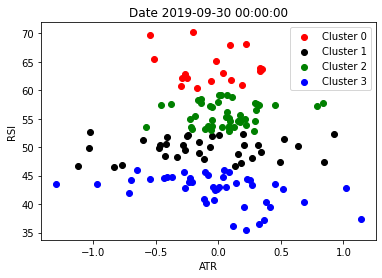

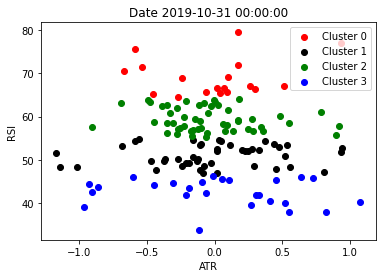

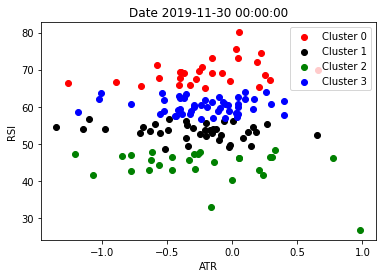

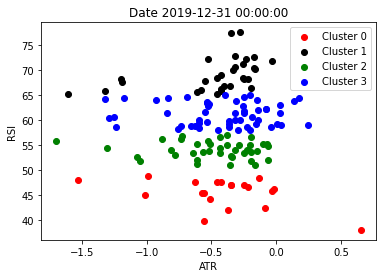

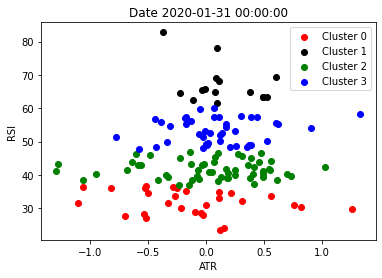

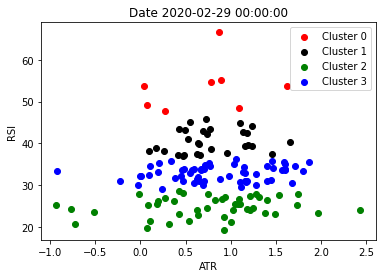

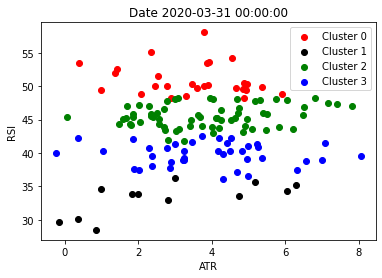

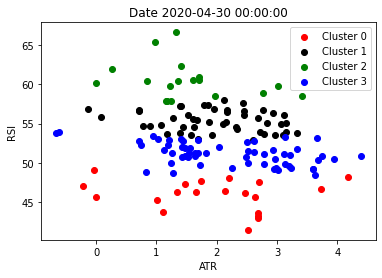

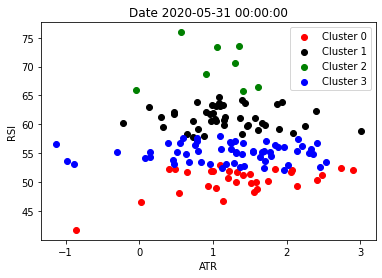

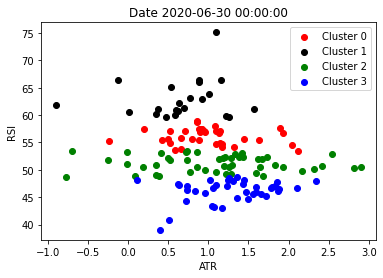

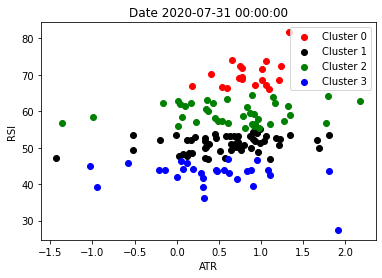

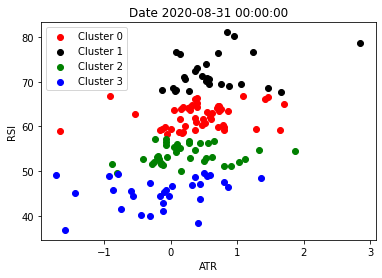

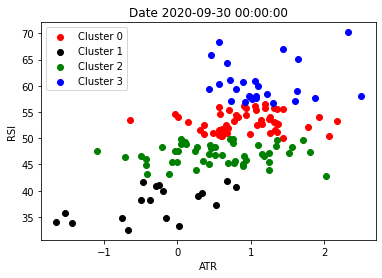

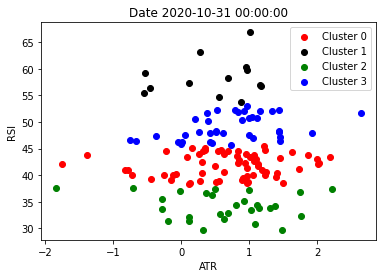

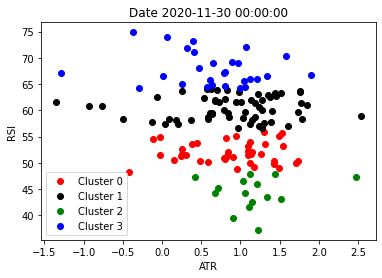

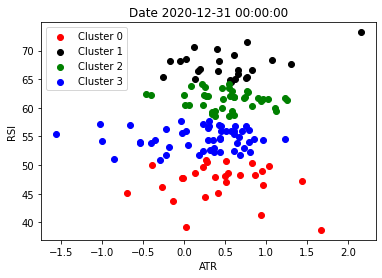

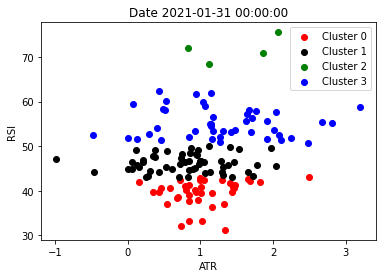

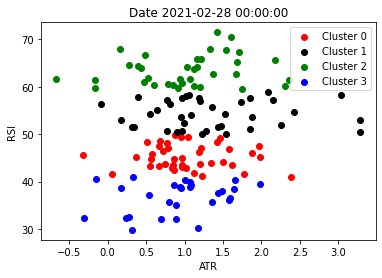

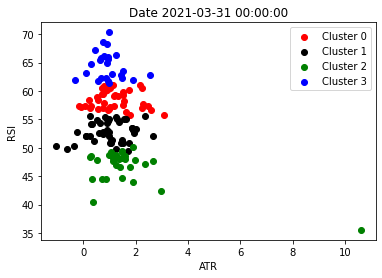

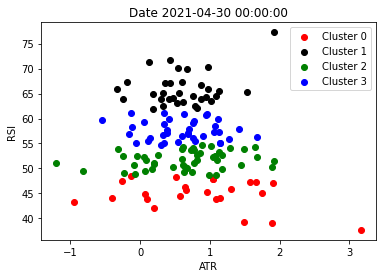

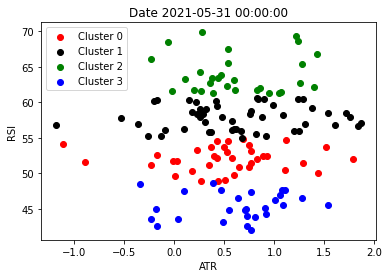

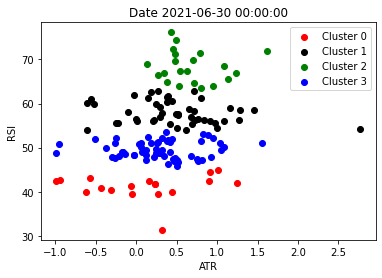

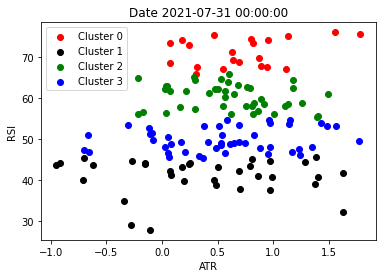

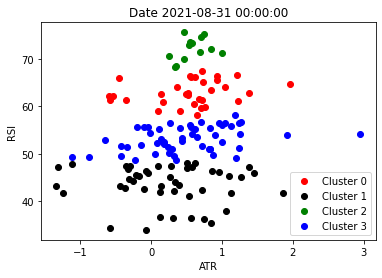

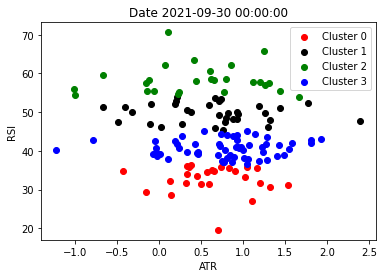

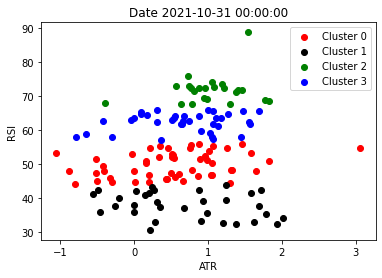

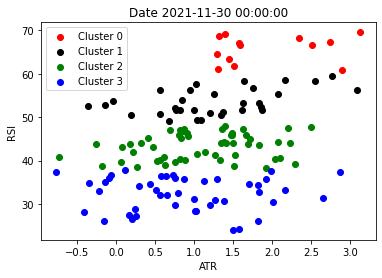

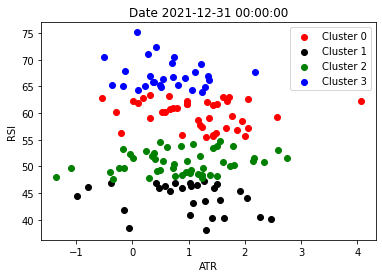

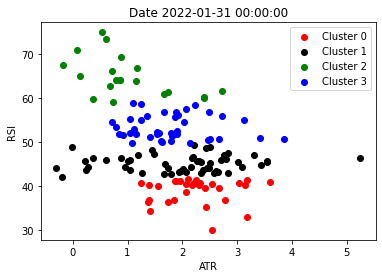

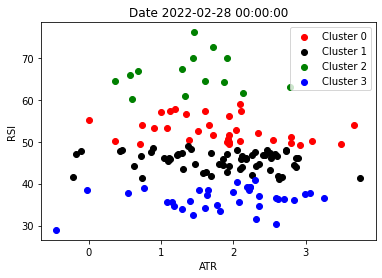

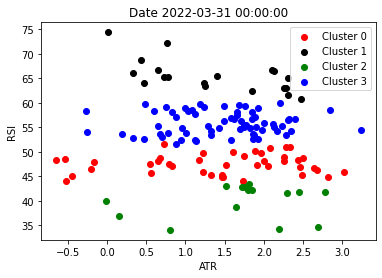

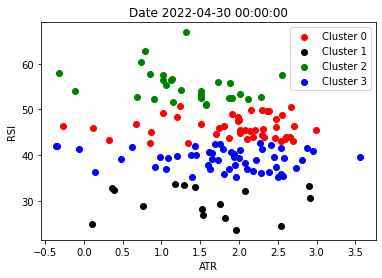

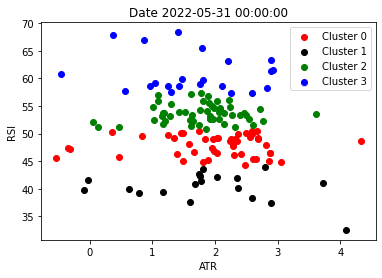

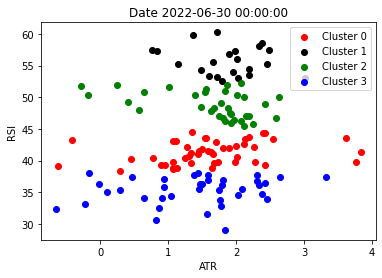

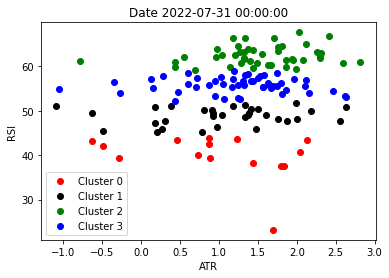

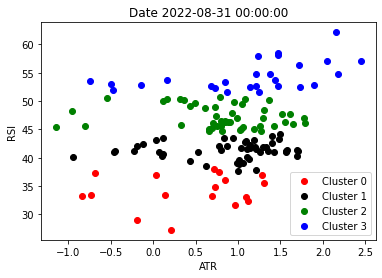

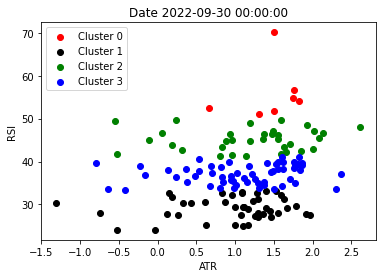

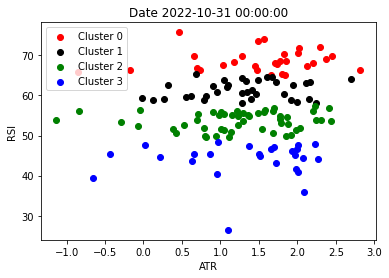

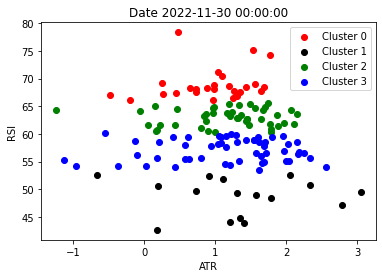

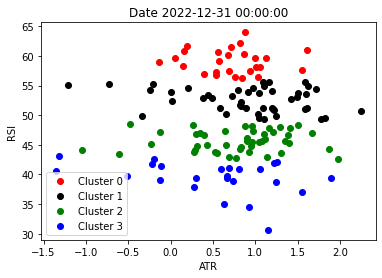

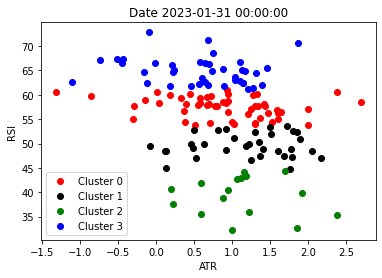

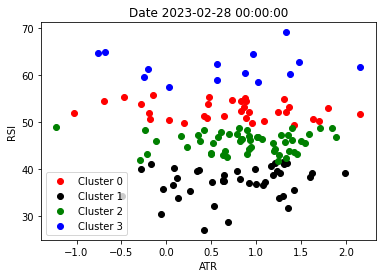

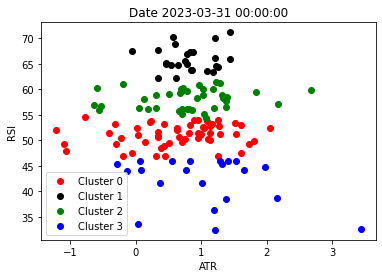

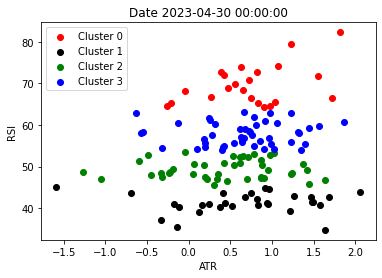

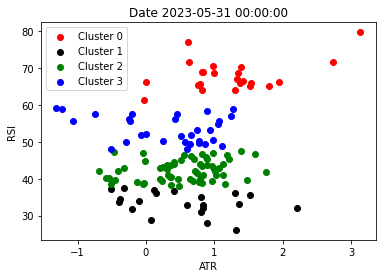

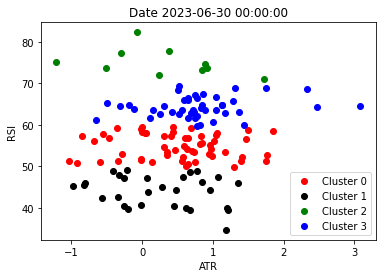

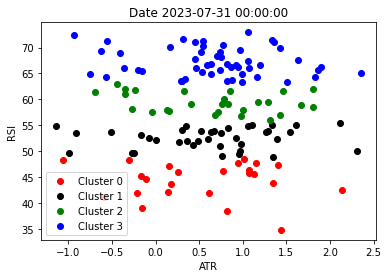

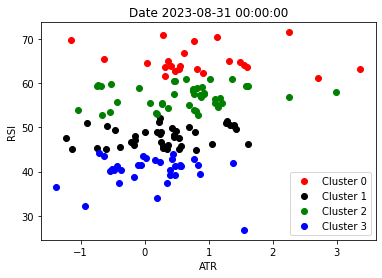

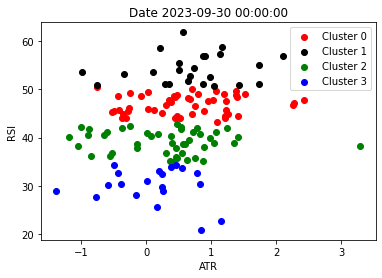

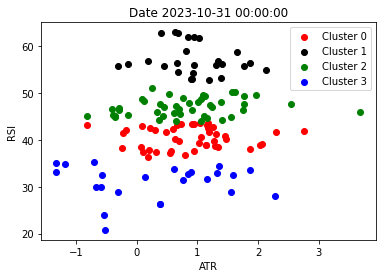

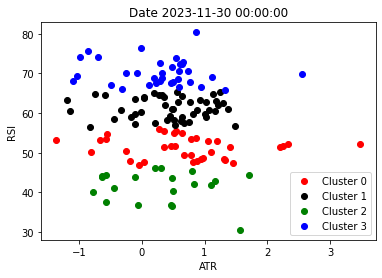

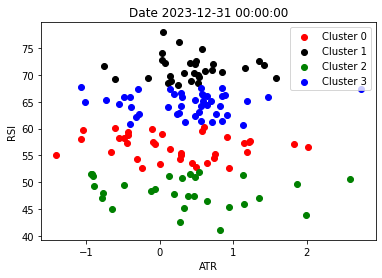

In [31]:
for i in stock_features_df.index.get_level_values('Date').unique().tolist():
    g = stock_features_df.xs(i,level=0)
    plt.title(f'Date {i}')
    plt.xlabel("ATR")
    plt.ylabel("RSI")
    plot_clusters(g)

In [32]:
stock_features_df#.columns[11]

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 AAPL     1.148746 -0.139616 -0.332574  0.841089 -0.743516   
           ABT      0.974205 -0.169509 -0.557544  0.085584  0.517765   
           ACN      1.030234 -0.298879 -0.161167 -0.010256 -0.098524   
           ADBE     0.996710 -0.284266 -0.078692 -0.468476 -1.197724   
           AIG      1.048525 -0.472771  0.811721 -0.751357 -0.610841   
...                      ...       ...       ...       ...       ...   
2023-12-31 VRTX     0.376808 -0.323843 -0.446705  0.323122  0.872078   
           VZ       0.418818 -0.622015  0.453085  0.124839 -0.145407   
           WFC      0.985467  0.140490  1.693871 -0.345004 -1.287869   
           WMT      0.487524  0.022611 -0.496116  0.602528  0.557927   
           XOM      0.560216 -0.013326  0.597975  0.210908  0.260415   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2012-12-31 AAPL    -0.651382  2.778827  2.846073  2.913320      -0.003935   
           ABT     -0.923272  3.252231  3.268683  3.285136      -0.014091   
           ACN     -0.765158  3.996828  4.046955  4.097082      -0.013351   
           ADBE    -0.896457  3.567346  3.626436  3.685525       0.000183   
           AIG     -0.728207  3.297750  3.342037  3.386324      -0.018144   
...                      ...       ...       ...       ...            ...   
2023-12-31 VRTX     1.471938  5.817492  5.953002  6.088512       0.000028   
           VZ      -1.077085  3.616386  3.640871  3.665356       0.000043   
           WFC     -0.299570  3.793252  3.881014  3.968775      -0.000008   
           WMT      0.442031  3.930176  3.958044  3.985912       0.000017   
           XOM      0.275963  4.584927  4.613518  4.642108      -0.000020   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2012-12-31 AAPL    -0.534613  44.756427   -0.090743   -0.052368   -0.064541   
           ABT     -0.174197  51.076380    0.007692    0.000000   -0.012714   
           ACN     -0.360531  44.317485   -0.020907   -0.006773   -0.013294   
           ADBE    -0.041893  65.897910    0.088703    0.052263    0.051179   
           AIG      0.433897  55.642357    0.065500    0.005282    0.024891   
...                      ...        ...         ...         ...         ...   
2023-12-31 VRTX     3.566956  65.899356    0.146783    0.060030    0.053758   
           VZ       0.435614  57.985178   -0.016436    0.035933    0.044826   
           WFC      2.020605  67.347851    0.103835    0.095253    0.067168   
           WMT     -0.308358  53.576899    0.023956   -0.012285   -0.001065   
           XOM     -0.639450  42.607129   -0.026864   -0.023690   -0.037375   

                    returns_6m  returns_9m  returns_12m  cluster  
Date       company                                                
2012-12-31 AAPL      -0.013918   -0.012189     0.023771        2  
           ABT        0.005167    0.010052     0.015517        1  
           ACN        0.019000    0.005890     0.020618        2  
           ADBE       0.025639    0.010465     0.024233        3  
           AIG        0.016017    0.015158     0.034738        0  
...                        ...         ...          ...      ...  
2023-12-31 VRTX       0.024490    0.028824     0.028985        3  
           VZ         0.008786    0.002693     0.002233        0  
           WFC        0.026895    0.033852     0.017357        3  
           WMT        0.004147    0.011190     0.012715        0  
           XOM       -0.008782   -0.007363    -0.005374        2  

[18868 rows x 19 columns]

### Pre-Defined Centroids

In [33]:
# Must be shape (n_features, n_clusters)
initial_centroids = np.zeros((4,18))

### Target RSI Values

In [34]:
target_rsi_values = [30, 45, 55, 70]
initial_centroids[:, 11] = target_rsi_values
initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [35]:
def get_clusters_improved(df):
    df['cluster'] = KMeans(n_clusters = 4, random_state = 42, init = initial_centroids).fit(df).labels_
    return df
stock_features_df = stock_features_df.drop('cluster',axis=1)
stock_features_df = stock_features_df.groupby('Date',group_keys=False).apply(get_clusters_improved)
stock_features_df

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 AAPL     1.148746 -0.139616 -0.332574  0.841089 -0.743516   
           ABT      0.974205 -0.169509 -0.557544  0.085584  0.517765   
           ACN      1.030234 -0.298879 -0.161167 -0.010256 -0.098524   
           ADBE     0.996710 -0.284266 -0.078692 -0.468476 -1.197724   
           AIG      1.048525 -0.472771  0.811721 -0.751357 -0.610841   
...                      ...       ...       ...       ...       ...   
2023-12-31 VRTX     0.376808 -0.323843 -0.446705  0.323122  0.872078   
           VZ       0.418818 -0.622015  0.453085  0.124839 -0.145407   
           WFC      0.985467  0.140490  1.693871 -0.345004 -1.287869   
           WMT      0.487524  0.022611 -0.496116  0.602528  0.557927   
           XOM      0.560216 -0.013326  0.597975  0.210908  0.260415   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2012-12-31 AAPL    -0.651382  2.778827  2.846073  2.913320      -0.003935   
           ABT     -0.923272  3.252231  3.268683  3.285136      -0.014091   
           ACN     -0.765158  3.996828  4.046955  4.097082      -0.013351   
           ADBE    -0.896457  3.567346  3.626436  3.685525       0.000183   
           AIG     -0.728207  3.297750  3.342037  3.386324      -0.018144   
...                      ...       ...       ...       ...            ...   
2023-12-31 VRTX     1.471938  5.817492  5.953002  6.088512       0.000028   
           VZ      -1.077085  3.616386  3.640871  3.665356       0.000043   
           WFC     -0.299570  3.793252  3.881014  3.968775      -0.000008   
           WMT      0.442031  3.930176  3.958044  3.985912       0.000017   
           XOM      0.275963  4.584927  4.613518  4.642108      -0.000020   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2012-12-31 AAPL    -0.534613  44.756427   -0.090743   -0.052368   -0.064541   
           ABT     -0.174197  51.076380    0.007692    0.000000   -0.012714   
           ACN     -0.360531  44.317485   -0.020907   -0.006773   -0.013294   
           ADBE    -0.041893  65.897910    0.088703    0.052263    0.051179   
           AIG      0.433897  55.642357    0.065500    0.005282    0.024891   
...                      ...        ...         ...         ...         ...   
2023-12-31 VRTX     3.566956  65.899356    0.146783    0.060030    0.053758   
           VZ       0.435614  57.985178   -0.016436    0.035933    0.044826   
           WFC      2.020605  67.347851    0.103835    0.095253    0.067168   
           WMT     -0.308358  53.576899    0.023956   -0.012285   -0.001065   
           XOM     -0.639450  42.607129   -0.026864   -0.023690   -0.037375   

                    returns_6m  returns_9m  returns_12m  cluster  
Date       company                                                
2012-12-31 AAPL      -0.013918   -0.012189     0.023771        0  
           ABT        0.005167    0.010052     0.015517        1  
           ACN        0.019000    0.005890     0.020618        0  
           ADBE       0.025639    0.010465     0.024233        3  
           AIG        0.016017    0.015158     0.034738        2  
...                        ...         ...          ...      ...  
2023-12-31 VRTX       0.024490    0.028824     0.028985        0  
           VZ         0.008786    0.002693     0.002233        2  
           WFC        0.026895    0.033852     0.017357        0  
           WMT        0.004147    0.011190     0.012715        2  
           XOM       -0.008782   -0.007363    -0.005374        1  

[18868 rows x 19 columns]

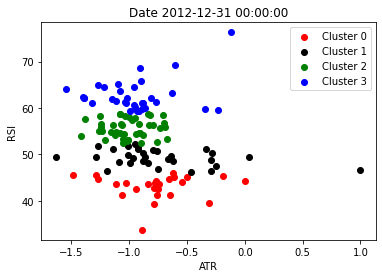

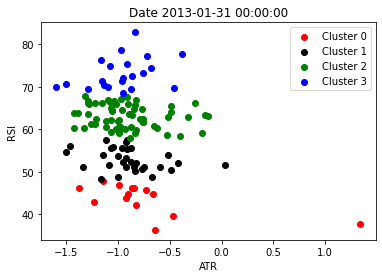

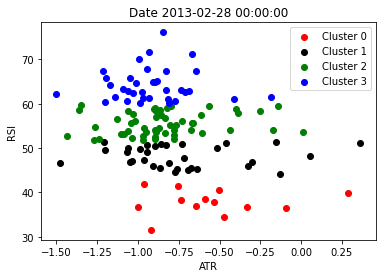

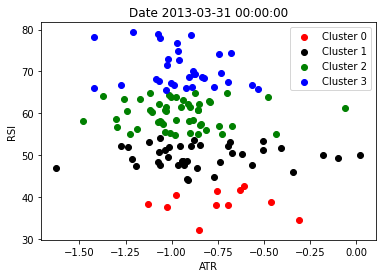

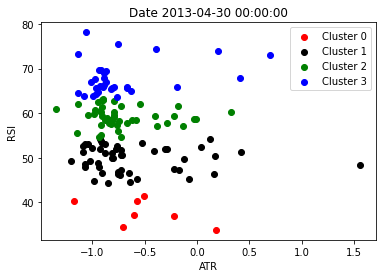

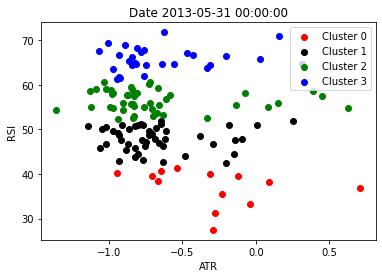

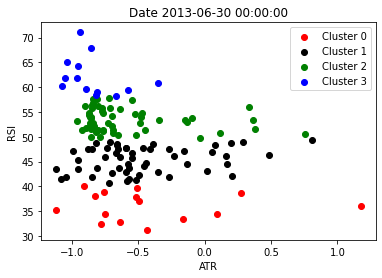

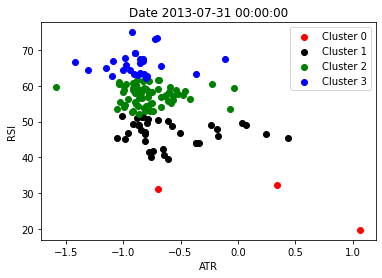

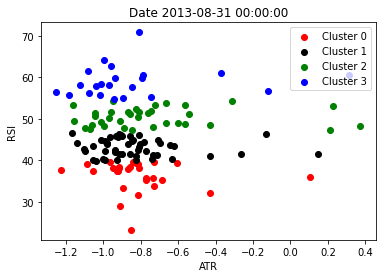

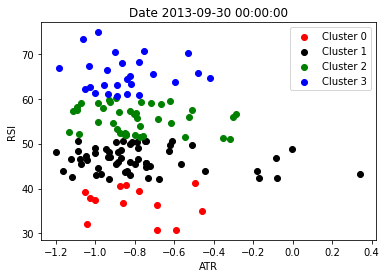

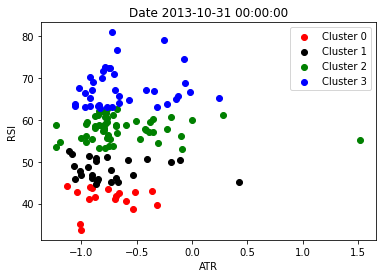

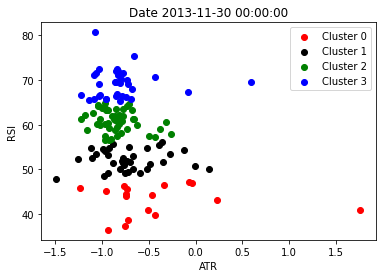

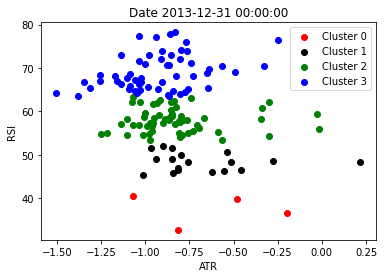

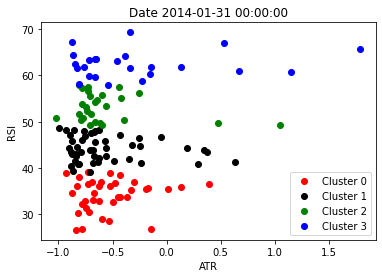

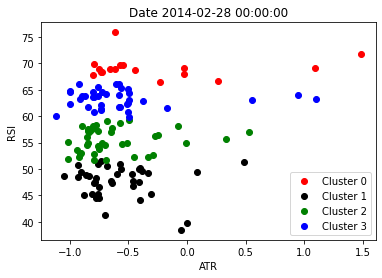

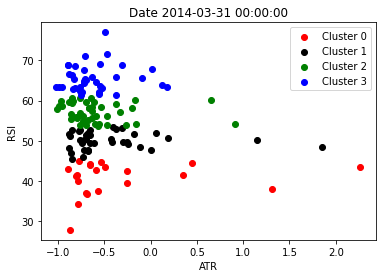

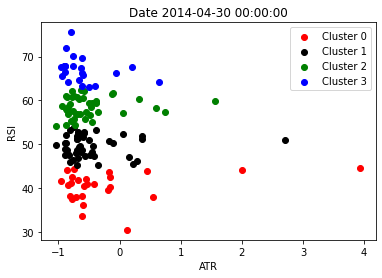

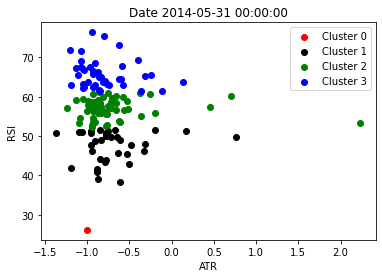

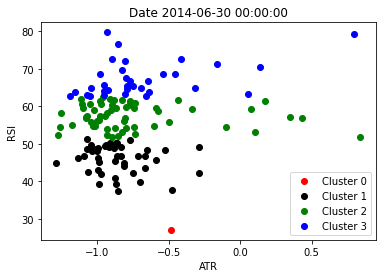

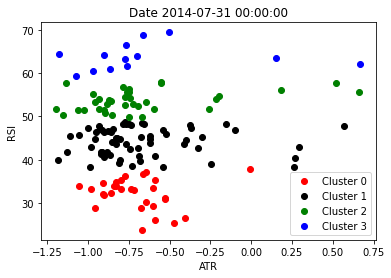

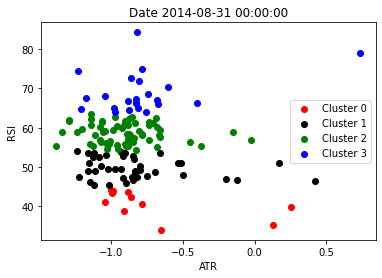

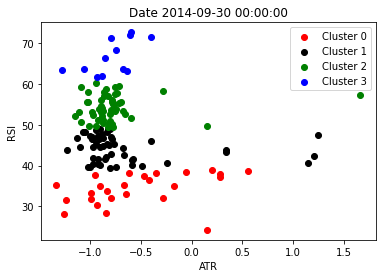

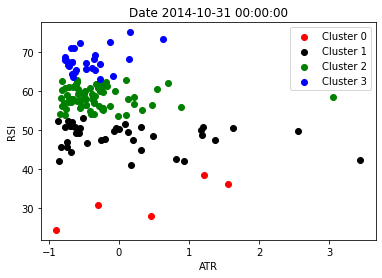

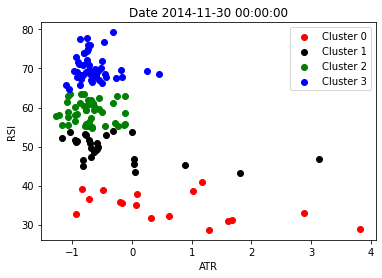

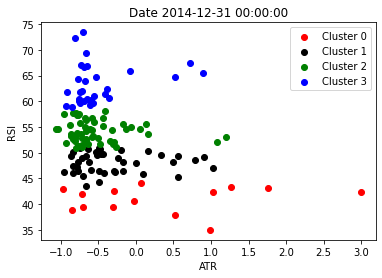

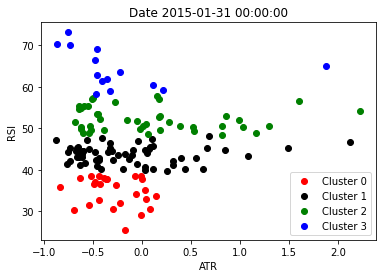

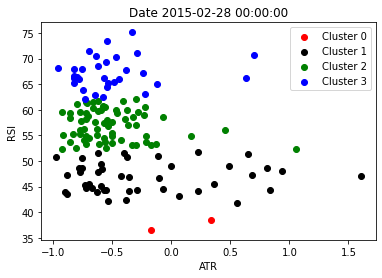

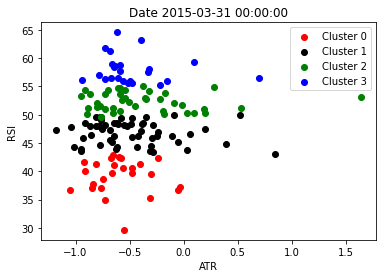

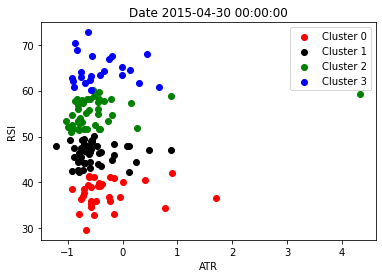

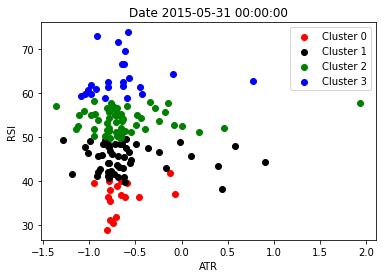

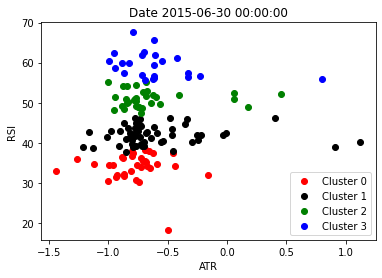

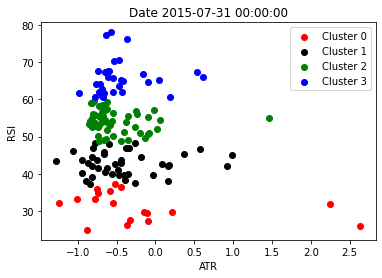

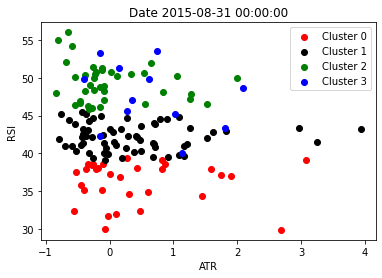

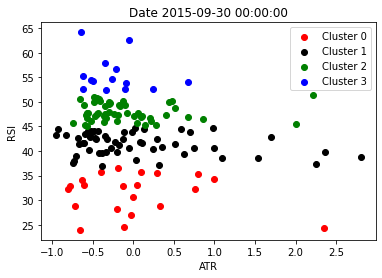

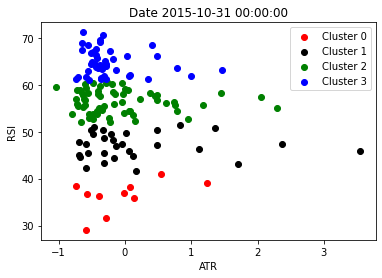

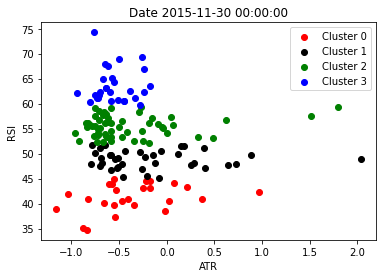

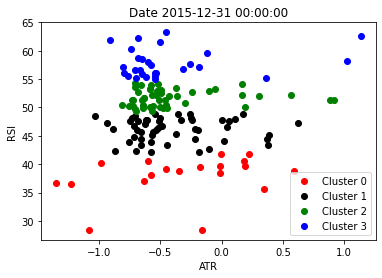

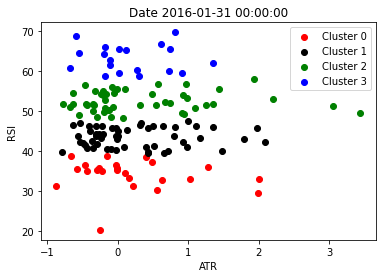

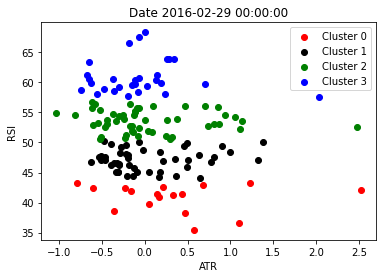

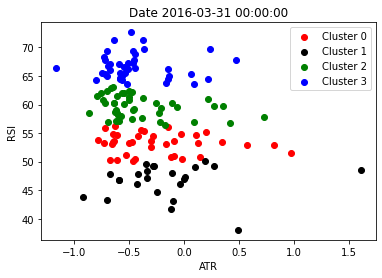

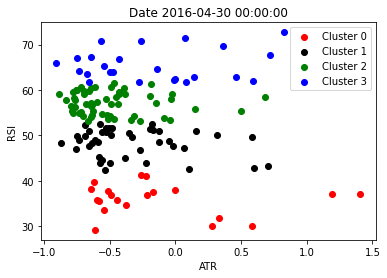

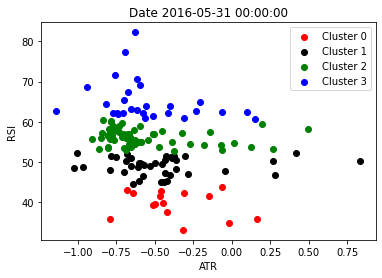

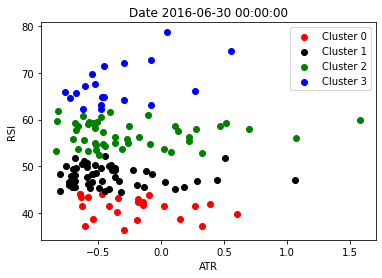

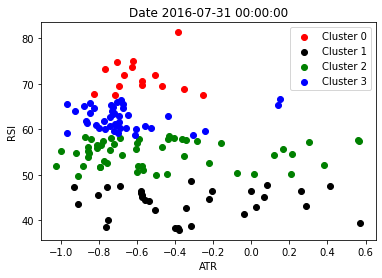

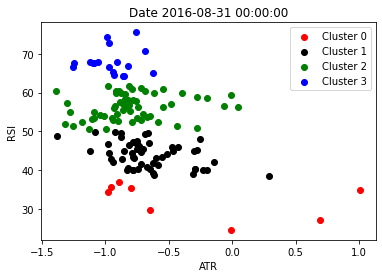

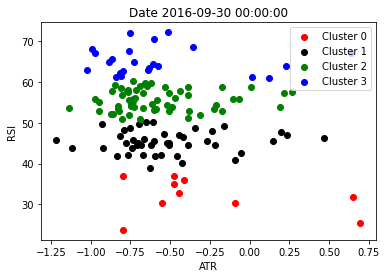

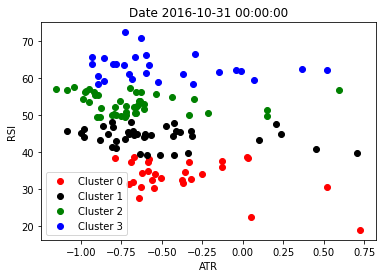

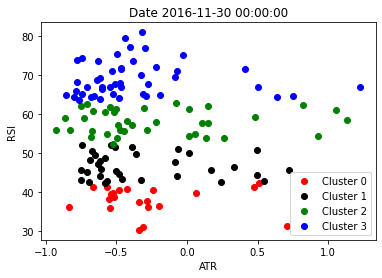

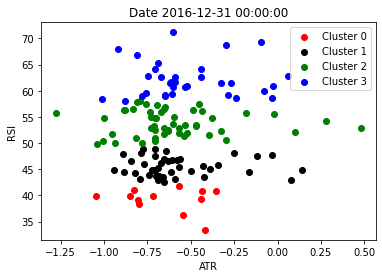

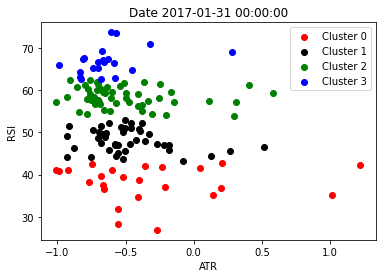

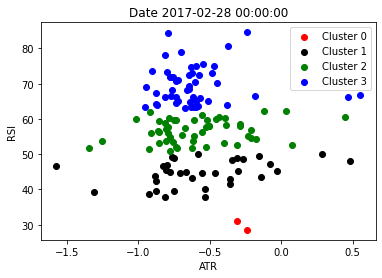

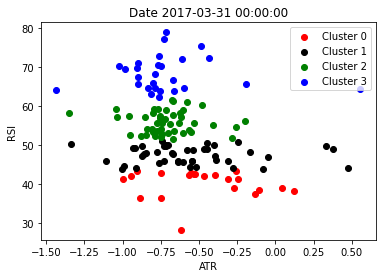

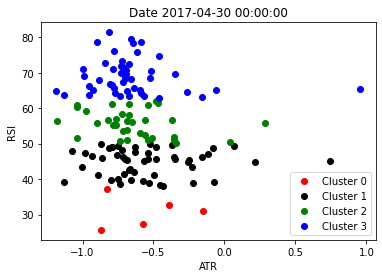

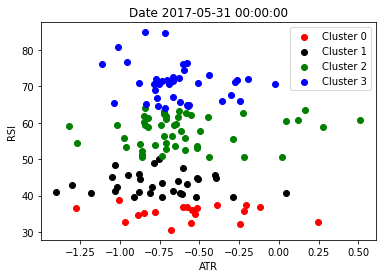

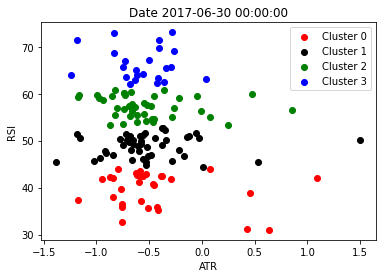

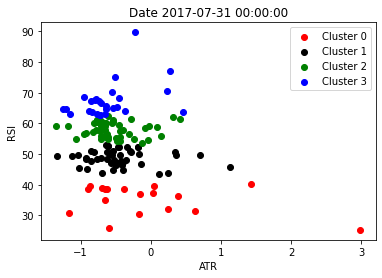

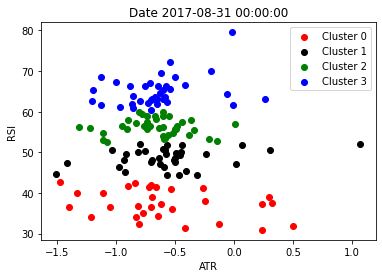

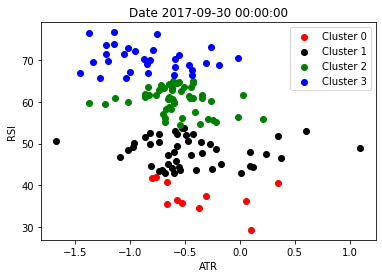

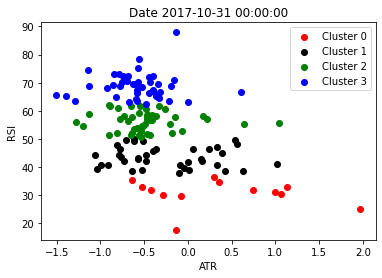

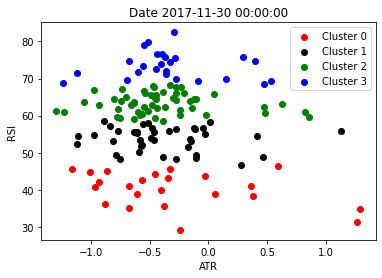

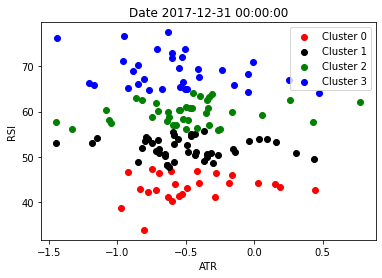

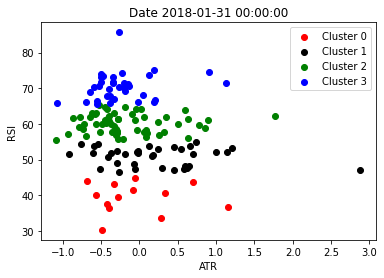

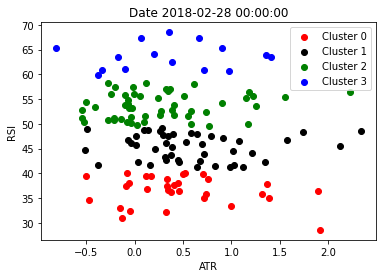

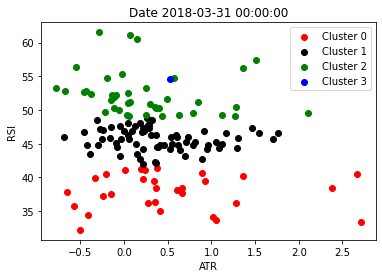

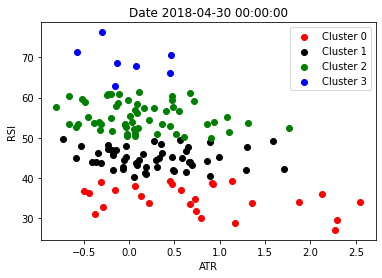

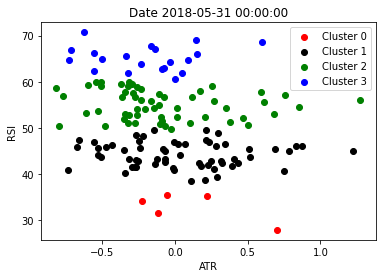

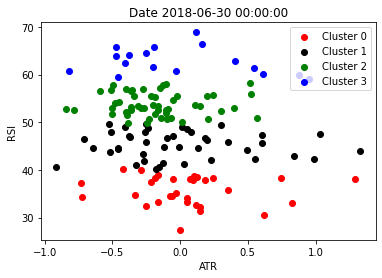

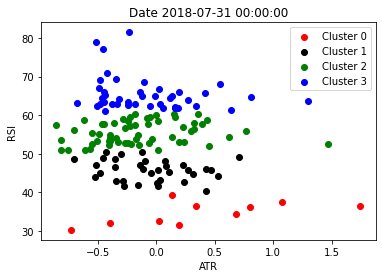

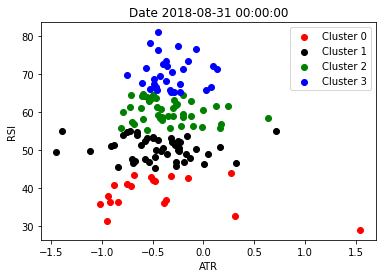

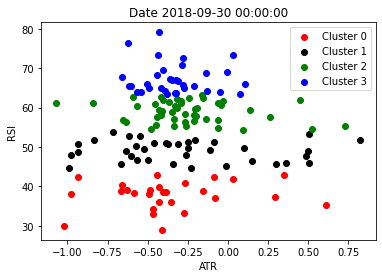

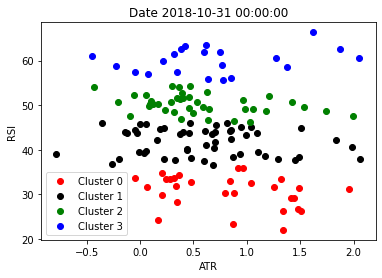

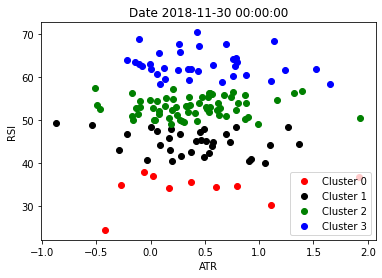

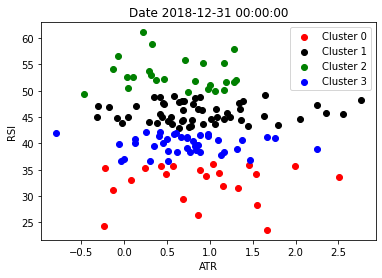

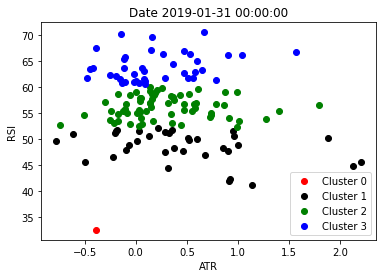

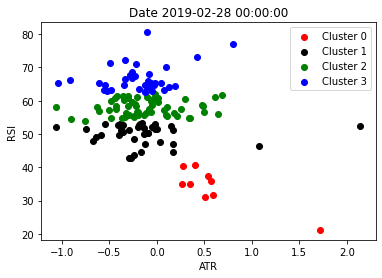

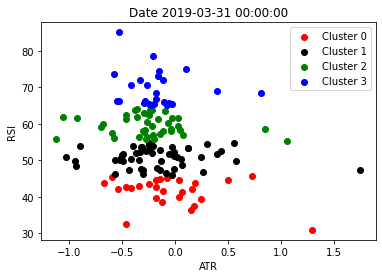

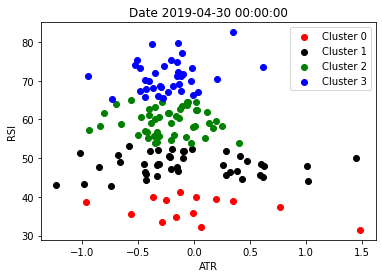

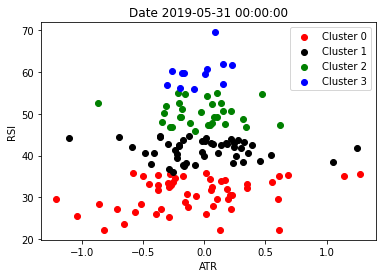

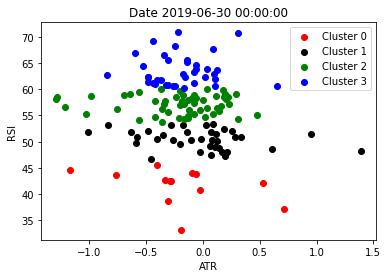

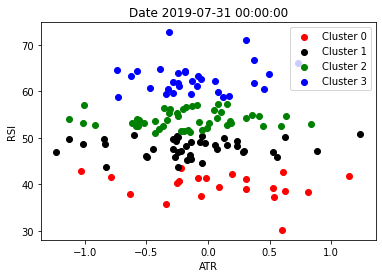

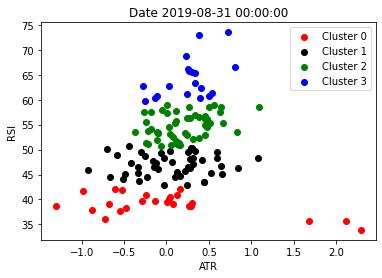

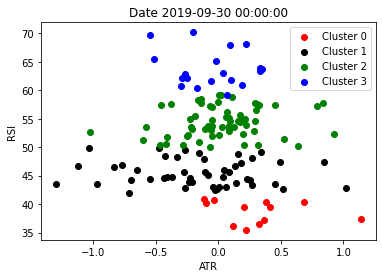

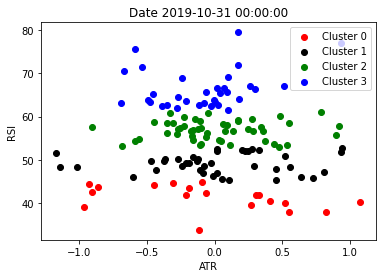

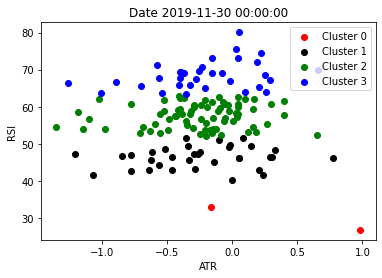

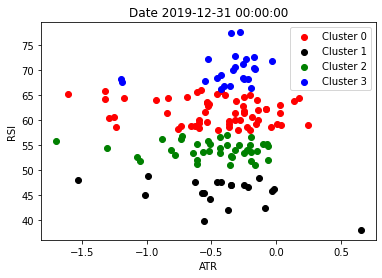

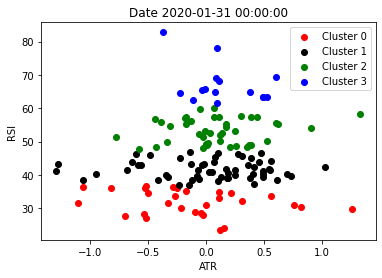

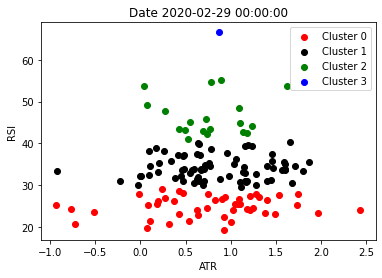

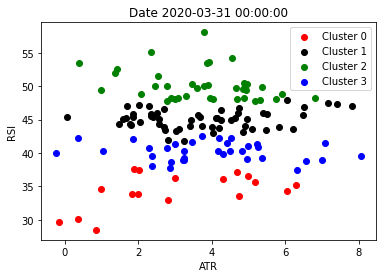

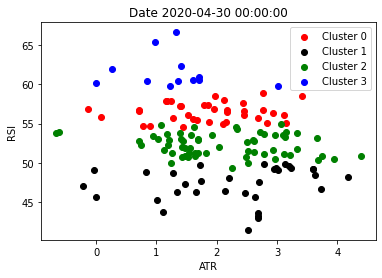

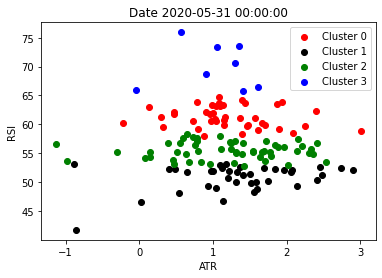

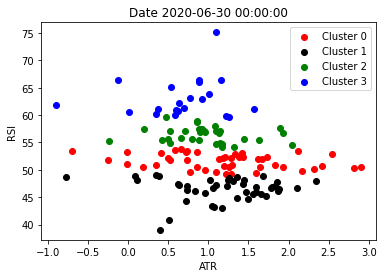

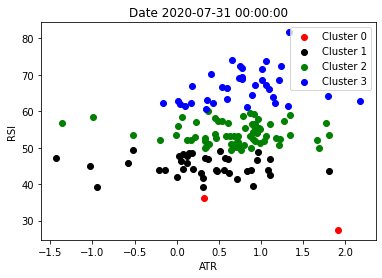

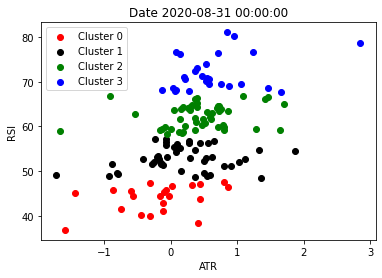

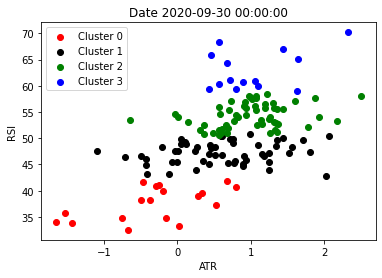

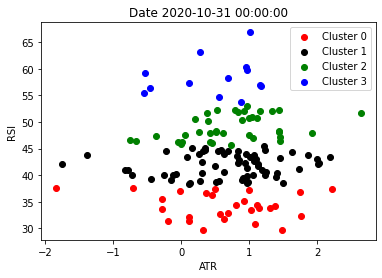

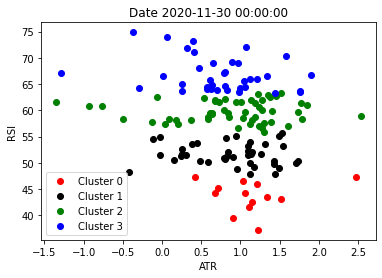

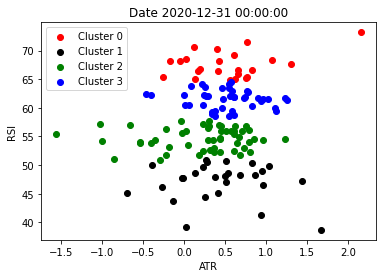

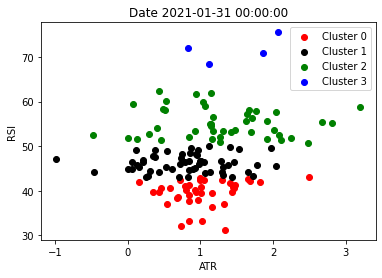

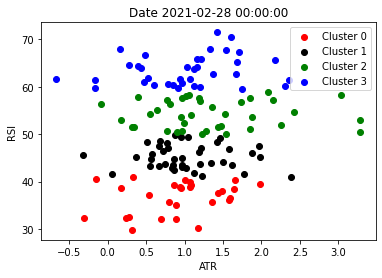

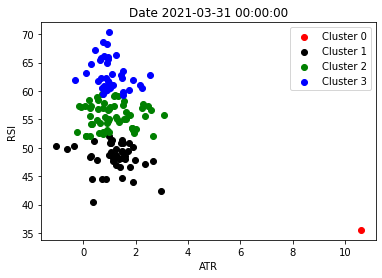

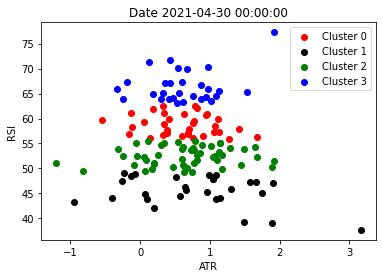

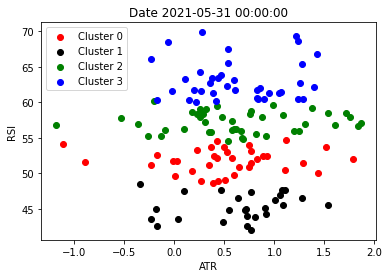

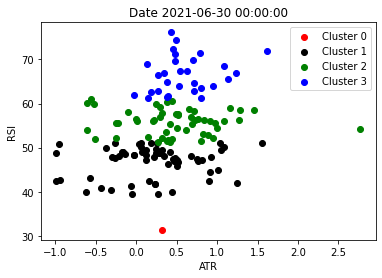

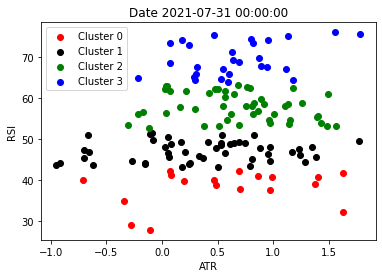

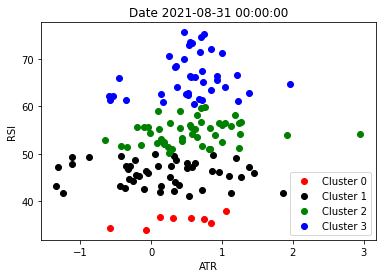

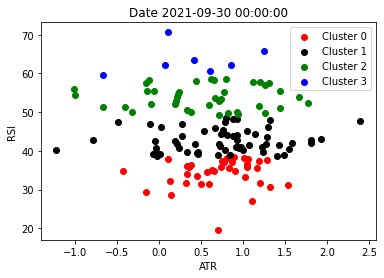

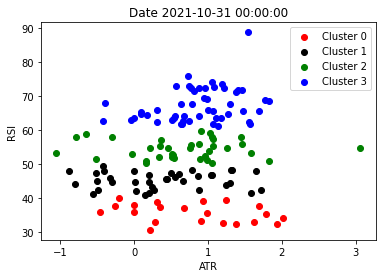

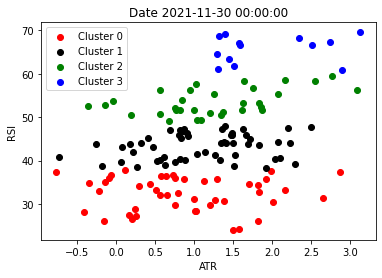

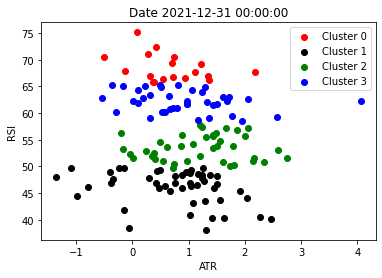

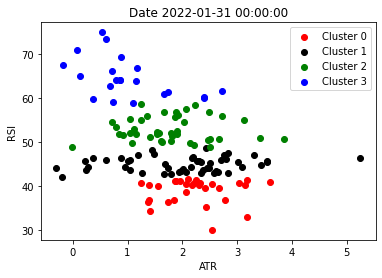

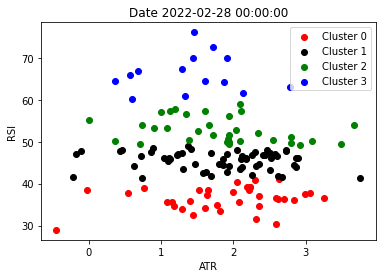

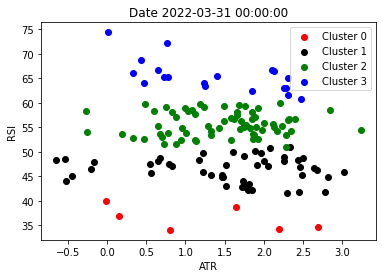

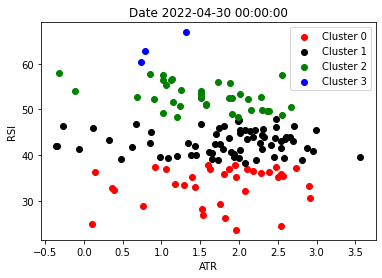

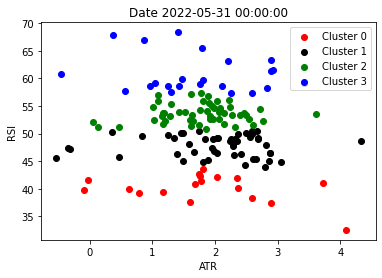

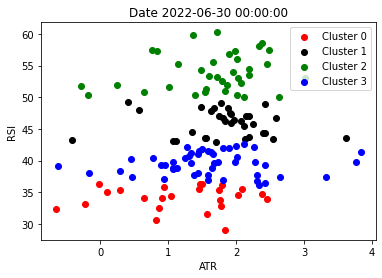

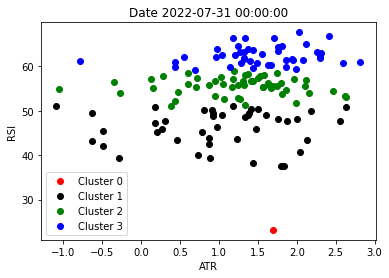

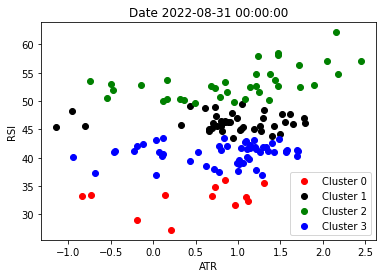

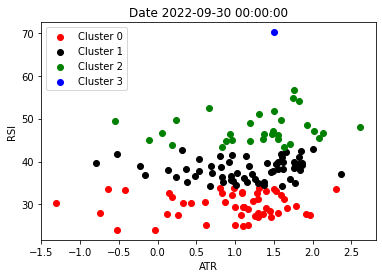

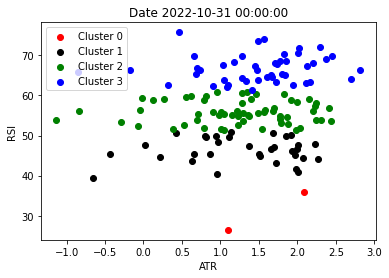

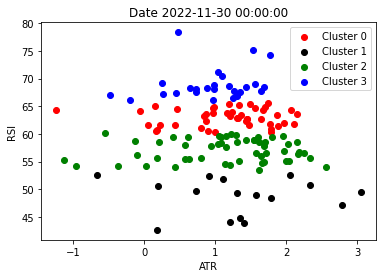

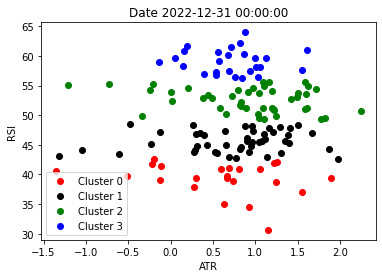

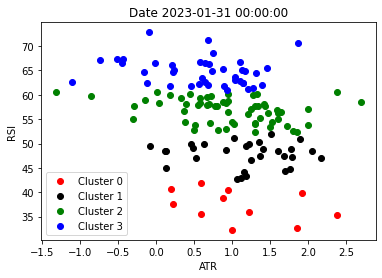

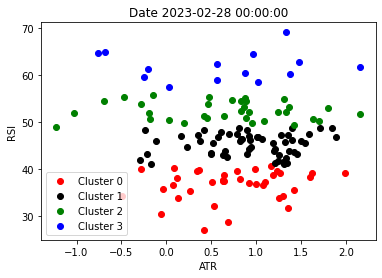

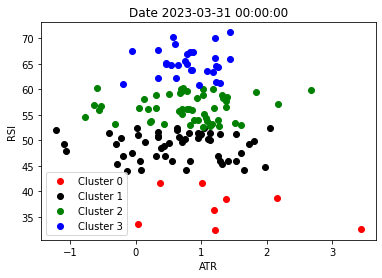

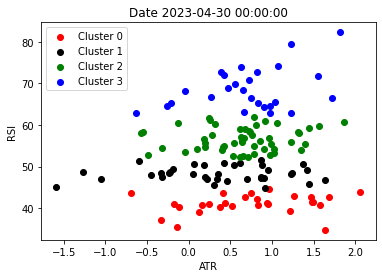

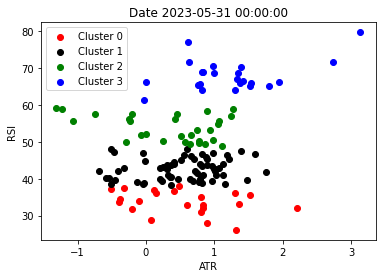

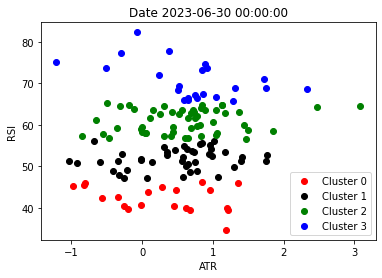

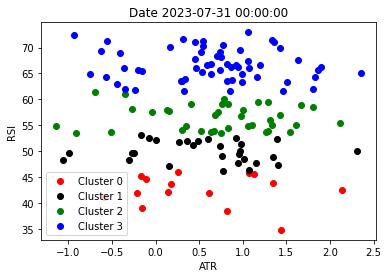

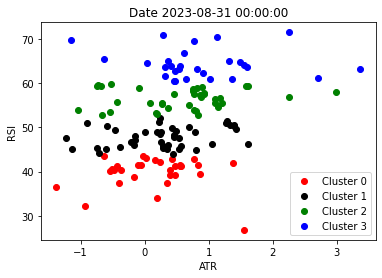

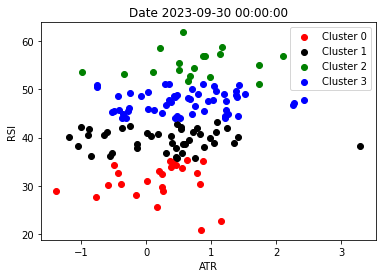

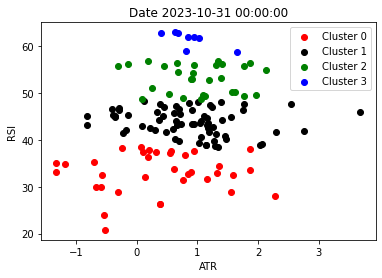

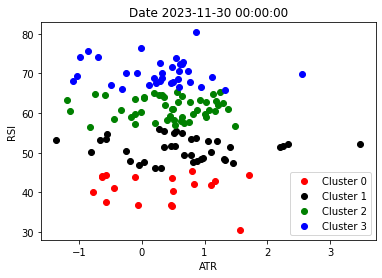

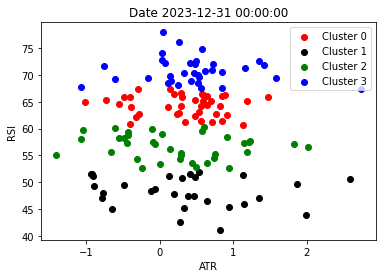

In [36]:
for i in stock_features_df.index.get_level_values('Date').unique().tolist():
    g = stock_features_df.xs(i,level=0)
    plt.title(f'Date {i}')
    plt.xlabel("ATR")
    plt.ylabel("RSI")
    plot_clusters(g)

## Select stocks based off cluster, form portfolio based on Efficient Frontier max Sharp Ratio Optimization

Hypothesis: stocks clustered around RSI 70 will outperform in following month (Cluster 3)

In [37]:
max_rsi_df = stock_features_df[stock_features_df['cluster'] == 3]
max_rsi_df = max_rsi_df.reset_index(level=1)

In [38]:
max_rsi_df.index = max_rsi_df.index + pd.DateOffset(1)
max_rsi_df = max_rsi_df.reset_index().set_index(['Date','company'])
max_rsi_df

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2013-01-01 ADBE     0.996710 -0.284266 -0.078692 -0.468476 -1.197724   
           AMAT     1.239025  0.492769  0.393636 -0.185001 -0.553620   
           AMT      0.583337 -0.442033 -0.384285  0.283628  0.269966   
           BAC      1.193921 -0.299324  1.360721 -0.965500 -0.826130   
           BK       1.148596 -0.315369  1.183426 -0.419587 -0.545703   
...                      ...       ...       ...       ...       ...   
2024-01-01 SHW      0.944065  0.415107 -0.055447  0.994857  0.353098   
           SPGI     1.127811  0.032569 -0.582852  0.251856  0.323443   
           TGT      1.010456  0.280306  0.158384 -0.373069  0.055414   
           TMUS     0.533508  0.635985 -0.098892  0.122428  0.375668   
           UNP      0.804014  0.123078 -0.228792 -0.072710  0.417251   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2013-01-01 ADBE    -0.896457  3.567346  3.626436  3.685525       0.000183   
           AMAT    -0.881045  2.309080  2.345777  2.382474      -0.008362   
           AMT     -0.887862  4.095256  4.119720  4.144185      -0.016603   
           BAC     -0.902890  2.209482  2.298385  2.387288      -0.011045   
           BK      -1.322432  2.937774  3.000341  3.062909      -0.024510   
...                      ...       ...       ...       ...            ...   
2024-01-01 SHW      0.574274  5.630991  5.705841  5.780690       0.000024   
           SPGI     0.526001  6.028887  6.066760  6.104632       0.000050   
           TGT      0.106601  4.881870  4.926033  4.970196       0.000059   
           TMUS     0.619232  5.031128  5.059493  5.087858       0.000090   
           UNP      0.467827  5.426836  5.476773  5.526710       0.000026   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2013-01-01 ADBE    -0.041893  65.897910    0.088703    0.052263    0.051179   
           AMAT    -0.099090  61.147520    0.066170    0.043504    0.010990   
           AMT      0.104241  61.005288    0.034488    0.014663    0.027814   
           BAC      0.759281  68.588829    0.163955    0.116676    0.086077   
           BK       0.520231  61.156843    0.073517    0.019836    0.045314   
...                      ...        ...         ...         ...         ...   
2024-01-01 SHW      3.446334  74.792667    0.118723    0.104413    0.070191   
           SPGI     2.112378  69.660153    0.059375    0.078691    0.065065   
           TGT      1.538067  68.563416    0.064345    0.111051    0.080400   
           TMUS     1.694127  70.815994    0.065670    0.057994    0.047630   
           UNP      2.570600  70.412739    0.096454    0.077268    0.060620   

                    returns_6m  returns_9m  returns_12m  cluster  
Date       company                                                
2013-01-01 ADBE       0.025639    0.010465     0.024233        3  
           AMAT       0.002600   -0.006608     0.008120        3  
           AMT        0.017910    0.024375     0.022388        3  
           BAC        0.060499    0.022112     0.051073        3  
           BK         0.028627    0.008948     0.023501        3  
...                        ...         ...          ...      ...  
2024-01-01 SHW        0.027967    0.037897     0.023873        3  
           SPGI       0.016597    0.028408     0.023766        3  
           TGT        0.016057   -0.013835    -0.001132        3  
           TMUS       0.024945    0.011843     0.011731        3  
           UNP        0.032872    0.024447     0.016437        3  

[3753 rows x 19 columns]

In [39]:
dates = max_rsi_df.index.get_level_values('Date').unique().tolist()
date_dict = {}

for date in dates:
    date_dict[date.strftime('%Y-%m-%d')] = max_rsi_df.xs(date,level=0).index.tolist()
    
date_dict

{'2013-01-01': ['ADBE',
  'AMAT',
  'AMT',
  'BAC',
  'BK',
  'C',
  'CAT',
  'CMG',
  'CMI',
  'CRM',
  'CTSH',
  'DD',
  'EMR',
  'F',
  'FSLR',
  'GM',
  'GS',
  'JNPR',
  'JPM',
  'LOW',
  'LVS',
  'MGM',
  'MOS',
  'MS',
  'NFLX',
  'NKE',
  'ORCL',
  'PARA',
  'SCHW',
  'UAL',
  'V',
  'VLO',
  'WBA'],
 '2013-02-01': ['AMAT',
  'BMY',
  'BRK-B',
  'DE',
  'EMR',
  'GS',
  'HAL',
  'HES',
  'LVS',
  'MCD',
  'MDT',
  'MMM',
  'MS',
  'NFLX',
  'OXY',
  'PG',
  'SCHW',
  'TMO',
  'TRV',
  'VLO',
  'WBA'],
 '2013-03-01': ['AMAT',
  'AMGN',
  'BIIB',
  'BMY',
  'BRK-B',
  'CL',
  'CSX',
  'CVX',
  'DHR',
  'DUK',
  'FDX',
  'GE',
  'GILD',
  'GOOG',
  'GOOGL',
  'HON',
  'HPQ',
  'JNJ',
  'LLY',
  'MCD',
  'MCK',
  'MMM',
  'MU',
  'NFLX',
  'NSC',
  'PEP',
  'PG',
  'RTX',
  'T',
  'TRV',
  'TXN',
  'UNP',
  'UPS',
  'VLO',
  'VZ'],
 '2013-04-01': ['ADBE',
  'AMGN',
  'AXP',
  'BA',
  'BAX',
  'BIIB',
  'BMY',
  'CL',
  'CSX',
  'CVS',
  'DUK',
  'EXC',
  'GILD',
  'HON',
  'HPQ',
 

### Define Portfolio Optimization Function

In [40]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [41]:
def optimize_weights(prices):
    returns = expected_returns.mean_historical_return(prices = prices,
                                                     frequency = 252)
    cov = risk_models.sample_cov(prices = prices, frequency = 252)
    ef = EfficientFrontier(returns, cov, weight_bounds = (0, 0.25), solver = 'SCS')
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

### Get Fresh Stock Data

In [42]:
stock_diff_df = stocks_df.dropna().unstack()['Adj Close']
stock_diff_df

company              A        AAL        AAPL        ABBV        ABNB  \
Date                                                                    
2011-02-08   28.442259   9.314284   10.739720         NaN         NaN   
2011-02-09   27.965750   9.314284   10.829215         NaN         NaN   
2011-02-10   28.332788   9.286002   10.719764         NaN         NaN   
2011-02-11   28.989592   9.549971   10.789611         NaN         NaN   
2011-02-14   28.841492   9.399132   10.860058         NaN         NaN   
...                ...        ...         ...         ...         ...   
2024-02-16  134.839996  14.640000  182.309998  177.490005  152.509995   
2024-02-20  134.139999  14.700000  181.559998  175.750000  148.149994   
2024-02-21  135.330002  14.790000  182.320007  175.139999  149.240005   
2024-02-22  132.020004  15.240000  184.369995  176.750000  155.259995   
2024-02-23  132.029999  15.130000  182.520004  178.089996  152.660004   

company            ABT       ACGL         ACN        ADBE         ADI  ...  \
Date                                                                   ...   
2011-02-08   16.642038  10.097778   41.222626   33.570000   29.129320  ...   
2011-02-09   16.616491  10.138889   41.269600   33.009998   29.269012  ...   
2011-02-10   16.598248  10.123333   41.496708   33.570000   29.401361  ...   
2011-02-11   16.623798  10.251111   41.034672   33.669998   29.842487  ...   
2011-02-14   16.777048  10.126667   41.042503   33.860001   30.136580  ...   
...                ...        ...         ...         ...         ...  ...   
2024-02-16  114.010002  86.110001  369.480011  546.659973  188.240005  ...   
2024-02-20  116.639999  85.370003  362.950012  541.909973  189.399994  ...   
2024-02-21  117.870003  84.709999  360.910004  538.520020  193.720001  ...   
2024-02-22  119.019997  85.820000  371.309998  537.570007  191.910004  ...   
2024-02-23  119.459999  87.290001  377.320007  553.440002  190.110001  ...   

company           WYNN        XEL         XOM       XRAY         XYL  \
Date                                                                   
2011-02-08   84.735779  15.408275   49.852173  33.311295         NaN   
2011-02-09   85.687622  15.427714   49.593822  32.696430         NaN   
2011-02-10   84.714630  15.421237   49.984325  32.877262         NaN   
2011-02-11   91.025055  15.505471   49.756027  33.112373         NaN   
2011-02-14   90.214188  15.362921   51.011654  32.931522         NaN   
...                ...        ...         ...        ...         ...   
2024-02-16  105.129997  59.070000  103.730003  33.580002  123.430000   
2024-02-20  103.230003  59.189999  102.750000  33.750000  124.099998   
2024-02-21  102.379997  59.810001  104.849998  33.080002  123.489998   
2024-02-22  102.419998  59.330002  104.760002  33.570000  125.099998   
2024-02-23  104.160004  59.330002  103.839996  33.910000  125.629997   

company            YUM         ZBH        ZBRA       ZION         ZTS  
Date                                                                   
2011-02-08   27.797132   52.633278   40.209999  20.019398         NaN  
2011-02-09   27.746687   52.115360   40.700001  19.924812         NaN  
2011-02-10   27.881208   52.712265   40.950001  19.396746         NaN  
2011-02-11   27.898039   53.221394   41.180000  19.672598         NaN  
2011-02-14   28.195110   53.353069   41.099998  19.475559         NaN  
...                ...         ...         ...        ...         ...  
2024-02-16  133.880005  124.709999  275.459991  40.639999  188.389999  
2024-02-20  133.949997  124.980003  271.929993  40.090000  186.550003  
2024-02-21  135.229996  128.350006  274.429993  39.599998  188.380005  
2024-02-22  137.330002  128.539993  279.480011  39.650002  196.660004  
2024-02-23  138.320007  129.179993  274.989990  39.029999  197.210007  

[3282 rows x 500 columns]

In [43]:
stock_log_df = np.log(stock_diff_df).diff()

In [44]:
returns_df = pd.DataFrame()

for start_date in date_dict.keys():
    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    companies = date_dict[start_date]
    optimize_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    optimize_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    optimize_df = stock_diff_df[optimize_start_date:optimize_end_date][companies]
    failure = True
    try:
        weights = optimize_weights(optimize_df)
        weights = pd.DataFrame(weights, index = pd.Series(0))
        failure = False
    except:
        print(f"Max Sharpe Optimization failed for {start_date}")
    if failure:
        print('hi')
        weights = pd.DataFrame([1/len(optimize_df.columns) for i in range(len(optimize_df.columns))],
                               index = optimize_df.columns.tolist(),
                               columns = pd.Series(0)).T
    log_df = stock_log_df[start_date:end_date]
    log_df = log_df.stack().to_frame('return').reset_index(level=0).merge(weights.stack().to_frame('weight').\
                                                                         reset_index(level=0,drop=True),
                                                                         left_index = True, right_index = True)\
                                                                    .reset_index().set_index(['Date','index']).unstack().stack()
    log_df.index.names = ['Date','Ticker']
    log_df['Weighted Return'] = log_df['return'] * log_df['weight']
    log_df = log_df.groupby(level=0)['Weighted Return'].sum().to_frame('Strategy Return')
    returns_df = pd.concat([returns_df, log_df])

Max Sharpe Optimization failed for 2015-09-01
hi
Max Sharpe Optimization failed for 2018-04-01
hi
Max Sharpe Optimization failed for 2020-03-01
hi
Max Sharpe Optimization failed for 2020-04-01
hi
Max Sharpe Optimization failed for 2022-05-01
hi
Max Sharpe Optimization failed for 2022-10-01
hi


In [45]:
returns_df#.plot()

Strategy Return
Date                       
2013-01-02         0.027314
2013-01-03        -0.012477
2013-01-04         0.006509
2013-01-07        -0.005403
2013-01-08         0.003615
...                     ...
2024-01-25         0.001607
2024-01-26        -0.014164
2024-01-29         0.018207
2024-01-30        -0.003273
2024-01-31        -0.009479

[2789 rows x 1 columns]

### Compare to SPY Benchmark

In [46]:
spy_df = yf.download('SPY', start = '2016-01-01', end = dt.date.today())

[*********************100%%**********************]  1 of 1 completed


In [47]:
spy_returns_df = np.log(spy_df[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)
spy_returns_df

SPY Buy&Hold
Date                    
2016-01-05      0.001690
2016-01-06     -0.012694
2016-01-07     -0.024284
2016-01-08     -0.011037
2016-01-11      0.000989
...                  ...
2024-02-16     -0.004992
2024-02-20     -0.005521
2024-02-21      0.000905
2024-02-22      0.020484
2024-02-23      0.000689

[2048 rows x 1 columns]

In [48]:
comp_df = returns_df.merge(spy_returns_df,left_index = True, right_index=True)

(array([16436., 16801., 17167., 17532., 17897., 18262., 18628., 18993.,
        19358., 19723.]),
 [Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

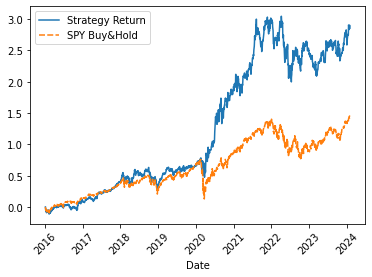

In [49]:
cum_returns_df = np.exp(np.log1p(comp_df).cumsum()) - 1

sns.lineplot(cum_returns_df)
plt.xticks(rotation=45)